#**Basketball's Hidden Playbook: Deciphering the Game with Data**

## **Spring 2024 Data Science Project**


Collaborators: Adiah Amadou, Ryan Kemajou

## **Group Members and Contributions**

### **Contribution Checkpoints**

A: Project idea - 5%<br>
B: Dataset Curation and Preprocessing - 10%<br>
C: Data Exploration and Summary Statistics - 10%<br>
D: ML Algorithm Design/Development - 25%<br>
E: ML Algorithm Training and Test Data Analysis - 20%<br>
F: Visualization, Result Analysis, Conclusion - 15%<br>
G: Final Tutorial Report Creation - 10%<br>
H: Additional (not listed above, if any) - 5%

Member 1: Adiah Amadou, Contribution: 100%.

Member 2: Ryan Kemajou, Contribution: 100%.




### **Detailed contribution**

Adiah Amadou: Throughout the project, my contributions spanned various crucial aspects. Firstly, I collaborated on crafting the introduction, ensuring clarity and relevance to set the stage for our work. Subsequently, I delved into data cleaning and exploratory analysis, employing techniques such as linear regression and mean mode median calculations to derive insights. My involvement extended to the meticulous formatting, layout, and typing of the final project, ensuring its presentation was professional and cohesive. Additionally, I played a pivotal role in refining the machine learning model, troubleshooting bugs, and incorporating features to enhance accuracy. Prior to implementation, I participated in researching the project idea and curated valuable sources to underpin our work. Furthermore, my contributions extended beyond technical tasks; I facilitated insightful conclusions and insights at each juncture, leveraging my understanding of the project's nuances. Moreover, I actively engaged in fostering a conducive workflow by posing pertinent questions aimed at optimizing outcomes. Overall, my multifaceted involvement contributed significantly to the project's success, amalgamating technical proficiency with strategic thinking.


Ryan Kemajou: In the recent data science project, I assisted in every stage of the project lifecycle. I contributed to the identification of the project theme, ensuring it was relevant and impactful. I conducted extensive research to locate valuable datasets that would serve as the backbone of our analysis. I meticulously cleaned a portion of the data before integrating it into our shared OneDrive. Once the datasets were distributed among the team, I further cleaned my assigned portion, preparing it for analysis. I proposed insightful questions for analysis post data cleaning and suggested effective ways to visualize our findings. I joined in brainstorming sessions to determine the most suitable statistical tests for our project. I assisted in exploring the data, uncovering patterns and insights that could guide our project. I actively participated in discussions on selecting the most appropriate model for our project and provided supplementary materials such as articles and youtube videos to enhance the team's understanding of the task more specifically the use of random forest classification. Lastly, I helped ensure our final tutorial was well-documented with clear and concise comments, enhancing its readability and understandability.

## **I- Introduction**

  In the competitive world of professional basketball, the ability to predict future outcomes isn't
    just about entertainment; it's about gaining a strategic advantage. Imagine coaches being able
    to forecast which NBA team(s) will dominate the next season. With such insights, coaches can
    fine-tune their training regimes, refine game strategies, and make informed decisions about
    player acquisitions. Players themselves can set more targeted performance goals, aiming for the
    stats that truly matter. Fans and bettors, too, can benefit greatly from such predictions,
    knowing which teams to support and why.

  Harnessing the power of advanced analytics and historical data, we aim to develop predictive
    models that not only forecast the outcomes of the NBA season but also empower coaches,
    players, fans, and bettors alike. Through comprehensive analysis of diverse datasets
    encompassing team and player statistics, awards, opponent performance, and injury reports, we
    seek to uncover hidden patterns and insights that illuminate the path to success in the NBA.

## **II- Data Collection**

  For this project, datasets chosen englobe NBA data from 1947 to present. These datasets were
    obtained from Kaggle, and Basketball-Reference.com, reliable websites for [basketball](https://www.britannica.com/sports/basketball)data
    

*   [2023 NBA Playoffs Summary | Basketball-Reference.com](https://www.basketball-reference.com/playoffs/NBA_2023.html)
*   [NBA Database (kaggle.com)](https://www.kaggle.com/datasets/wyattowalsh/basketball)


*   [NBA games data (kaggle.com)](https://www.kaggle.com/datasets/nathanlauga/nba-games)
*   [Data.org NBA Playoffs Datasets](https://data.world/etocco/nba-player-stats/workspace/file?filename=NBA_Player_Stats_2.csv)


*   [NBA Stats (1947-present) (kaggle.com)](https://www.kaggle.com/datasets/sumitrodatta/nba-aba-baa-stats)
*   [NBA Injuries from 2010-2020 (kaggle.com)](https://www.kaggle.com/datasets/ghopkins/nba-injuries-2010-2018)



  Our datasets contains more than 30,000 rows and over 30 columns with statistics
    encompassing the following;

   

1.   Team Season Stats: Detailed statistics capturing team performance metrics such as points scored, rebounds, assists, field goal percentages, and defensive statistics.
2.   Player Season Stats: Individual player statistics including points per game, rebounds, assists,
      steals, blocks, shooting percentages, and other relevant metrics.

3.   Awards (Players) Stats: Historical data on awards won by players, such as MVP awards, Defensive Player of the Year, Rookie of the Year, and other accolades.
4.   Opponent Team Stats: Statistics related to opponents faced by each team, including their performance metrics, strength of schedule, and head-to-head matchups.

5.   Player Injuries: Information on player injuries and their impact on team performance throughout the season.



  By assembling these datasets from trusted sources, we ensure the reliability and accuracy of the data used in our predictive models. This comprehensive approach allows us to analyze a wide range of factors that contribute to NBA team performance, enabling us to develop robust and insightful predictions for the upcoming season.

We decided to keep all of the files (mainly CSVs) relevant to this project in a drive so we mounted here.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


It's essential to bring in certain libraries so below are the libraries that will accompany us on our journey through this project.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import scipy.stats as stats
import statsmodels.api as sm
import math

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder


<h2 style="text-align: center"><strong>III - Data cleaning & Insights</strong></h2>

<img src="https://i.pinimg.com/originals/20/b9/8f/20b98fc9873e0f19ad6bcc1d80dac57e.jpg" alt="ready to scrub man">

We opted for a step-by-step approach in handling our dataframes. Below, we began by examining the CSV files related to players from each NBA team. Additionally, we consolidated the dataframes into a single one, named "player_df."

In [ ]:
df_totals = pd.read_csv('/content/drive/MyDrive/FINAL PROJECT CSVs/Player Totals.csv')
df_shooting = pd.read_csv('/content/drive/MyDrive/FINAL PROJECT CSVs/Player Shooting.csv')
df_play_by_play = pd.read_csv('/content/drive/MyDrive/FINAL PROJECT CSVs/Player Play By Play.csv')
df_per_game = pd.read_csv('/content/drive/MyDrive/FINAL PROJECT CSVs/Player Per Game.csv')
df_per_100_poss = pd.read_csv('/content/drive/MyDrive/FINAL PROJECT CSVs/Per 100 Poss.csv')
df_per_36_minutes = pd.read_csv('/content/drive/MyDrive/FINAL PROJECT CSVs/Per 36 Minutes.csv')


m1 = pd.merge(df_totals, df_shooting, on =['SEASON_ID', 'SEASON', 'PLAYER_ID', 'PLAYER', 'POSITION', 'AGE',  'LEAGUE', 'TEAM_ABBREVIATION', 'MINUTES_PLAYED'], how ='left')
m2 = pd.merge(m1, df_play_by_play, on =['SEASON_ID', 'SEASON',  'PLAYER', 'POSITION', 'AGE', 'EXPERIENCE', 'LEAGUE','GAMES', 'MINUTES_PLAYED'], how ='left')
m3 = pd.merge(m2, df_per_game, on =['SEASON_ID', 'SEASON', 'PLAYER_ID', 'PLAYER', 'POSITION', 'AGE', 'EXPERIENCE', 'LEAGUE', 'TEAM_ABBREVIATION', 'GAMES',  'FREE_THROW_PERCENTAGE',  'FIELD_GOAL_PERCENT'], how ='left')
m4 = pd.merge(m3, df_per_100_poss, on =['SEASON_ID', 'SEASON', 'PLAYER_ID', 'PLAYER', 'AGE', 'LEAGUE', 'TEAM_ABBREVIATION', 'GAMES', 'GAMES_STARTED', 'MINUTES_PLAYED', 'THREE_POINTERS_PERCENTAGE', 'TWO_POINTERS_PERCENTAGE', 'FREE_THROW_PERCENTAGE', 'YEARS_OF_EXPERIENCE'], how ='left')
player_df = pd.merge(m4, df_per_36_minutes, on =['SEASON_ID','POSITION', 'AGE', 'LEAGUE',  'GAMES', 'GAMES_STARTED', 'MINUTES_PLAYED', 'THREE_POINTERS_PERCENTAGE', 'TWO_POINTERS_PERCENTAGE', 'FREE_THROW_PERCENTAGE', 'YEARS_OF_EXPERIENCE', 'TEAM'], how ='left')

player_df.describe()


,SEASON_ID,SEASON,PLAYER_ID,BIRTH_YEAR,AGE,EXPERIENCE,GAMES,GAMES_STARTED,MINUTES_PLAYED,FIELD_GOALS_MADE,...,FREETHROW_ATTEMPTED_PER_36_MIN,OFFENSIVE_REBOUND_PER_36_MIN,DEFENSIVE_REBOUND_PER_36_MIN,TOTAL_REBOUND_PER_36_MIN,ASSIST_PER_36_MIN,STEALS_PER_36_MIN,BLOCKS_PER_36_MIN,TURNOVER_PER_36_MIN,PERSONAL_FOULS_PER_36_MIN,POINTS_PER_36_MIN
count,31787.00000,31787.000000,31787.000000,2870.000000,31765.000000,31787.000000,31787.000000,23150.000000,30704.000000,31787.000000,...,16697.000000,16697.000000,16697.000000,16697.000000,16697.000000,16697.000000,16697.000000,16697.000000,16697.000000,16697.000000
mean,15894.00000,1994.973008,2646.740114,1944.139721,26.486164,4.967691,48.607796,22.406177,1158.959386,187.590965,...,3.182793,1.779745,4.587794,6.367036,2.965131,1.124837,0.730017,2.064868,3.598341,13.326556
std,9176.26084,20.403059,1301.138515,15.162153,3.844564,3.723561,26.616961,27.814887,926.420014,184.565391,...,2.184569,1.633455,2.274799,3.304136,2.144295,0.776187,0.872100,1.305920,1.894635,5.179310
min,1.00000,1947.000000,1.000000,1914.000000,18.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7947.50000,1979.000000,1625.000000,1938.000000,24.000000,2.000000,25.000000,0.000000,308.000000,37.000000,...,1.800000,0.700000,3.100000,3.900000,1.500000,0.700000,0.200000,1.400000,2.500000,10.200000
50%,15894.00000,1998.000000,2733.000000,1946.000000,26.000000,4.000000,53.000000,7.000000,986.000000,132.000000,...,2.900000,1.300000,4.200000,5.700000,2.300000,1.000000,0.500000,1.900000,3.300000,13.100000
75%,23840.50000,2012.000000,3718.000000,1951.000000,29.000000,7.000000,74.000000,42.000000,1882.000000,286.000000,...,4.200000,2.600000,5.800000,8.400000,4.000000,1.400000,1.000000,2.500000,4.300000,16.200000
max,31787.00000,2024.000000,5197.000000,2002.000000,46.000000,22.000000,90.000000,83.000000,3882.000000,1597.000000,...,36.000000,36.000000,72.000000,72.000000,36.000000,18.000000,36.000000,36.000000,72.000000,108.000000


In [ ]:
player_df.columns.tolist()

['SEASON_ID',
 'SEASON',
 'PLAYER_ID',
 'PLAYER',
 'BIRTH_YEAR',
 'POSITION',
 'AGE',
 'EXPERIENCE',
 'LEAGUE',
 'TEAM_ABBREVIATION',
 'GAMES',
 'GAMES_STARTED',
 'MINUTES_PLAYED',
 'FIELD_GOALS_MADE',
 'FIELD_GOALS_AGAINST',
 'FIELD_GOAL_PERCENTAGE_x',
 'THREE_POINTERS_MADE',
 'THREE_POINTERS_ATTEMPTED',
 'THREE_POINTERS_PERCENTAGE',
 'TWO_POINTERS_MADE',
 'TWO_POINTERS_ATTEMPTED',
 'TWO_POINTERS_PERCENTAGE',
 'EFFECTIVE_FIELD_GOAL_PERCENTAGE',
 'FREE_THROWS_MADE',
 'FREE_THROW_ATTEMPTED',
 'FREE_THROW_PERCENTAGE',
 'OFFENSIVE_REBOUND',
 'DEFENSIVE_REBOUND',
 'TOTAL_REBOUND',
 'ASSISTS',
 'STEALS',
 'BLOCK',
 'TURNOVER',
 'PERSONAL_FOUL',
 'TOTAL_POINTS',
 'YEARS_OF_EXPERIENCE',
 'GAMES_PLAYED',
 'FIELD_GOAL_PERCENT',
 'AVERAGE_DISTANCE_OF_FIELD_GOALS_ATTEMPTED',
 'PERCENTAGE_FIELD_GOAL_ATTEMPTED_FROM_TWO_POINT_RANGE',
 'PERCENTAGE_FIELD_GOAL_ATTEMPTED_FROM_THREE_POINT_RANGE',
 'FIELD_GOAL_PERCENTAGE_FROM_TWO_POINT_RANGE',
 'FIELD_GOAL_PERCENTAGE_FROM_THREE_POINT_RANGE',
 'PERCENT_ASS

This function will help us identify any columns that are duplicated in our unified player dataframe

In [ ]:
def common_columns(dataframes):
    # Create a dictionary to count the occurrences of each column
    column_counts = {}

    # Iterate over all dataframes
    for df in dataframes:
        # Iterate over all columns in the current dataframe
        for col in df.columns:
            # If the column is already in the dictionary, increment its count
            if col in column_counts:
                column_counts[col] += 1
            # Otherwise, add the column to the dictionary with a count of 1
            else:
                column_counts[col] = 1

    # Return a list of columns that appear at least twice
    return [col for col, count in column_counts.items() if count >= 2]


In [ ]:
dfs=[df_totals,
df_shooting ,
df_play_by_play,
df_per_game,
df_per_100_poss,
df_per_36_minutes]
# dfs is your list of dataframes
common_cols = common_columns(dfs)
print(common_cols)


['SEASON_ID', 'SEASON', 'PLAYER_ID', 'PLAYER', 'POSITION', 'AGE', 'EXPERIENCE', 'LEAGUE', 'TEAM_ABBREVIATION', 'GAMES', 'GAMES_STARTED', 'MINUTES_PLAYED', 'FIELD_GOAL_PERCENTAGE', 'THREE_POINTERS_PERCENTAGE', 'TWO_POINTERS_PERCENTAGE', 'FREE_THROW_PERCENTAGE', 'YEARS_OF_EXPERIENCE', 'FIELD_GOAL_PERCENT', 'TEAM']


In [ ]:
player_df =player_df.drop([
'PLAYER_NAME','POSITINON','PLAYED_ID','GAMES_PLAYED', 'SEASON_ID',
 'BIRTH_YEAR',
 'POSITION',
 'LEAGUE',
 'THREE_POINTERS_ATTEMPTED',
 'TWO_POINTERS_ATTEMPTED',
 'YEARS_OF_EXPERIENCE',
 'GAMES_PLAYED',
 'FIELD_GOAL_PERCENT',
 'AVERAGE_DISTANCE_OF_FIELD_GOALS_ATTEMPTED',
 'PERCENTAGE_FIELD_GOAL_ATTEMPTED_FROM_TWO_POINT_RANGE',
 'PERCENTAGE_FIELD_GOAL_ATTEMPTED_FROM_THREE_POINT_RANGE',
 'FIELD_GOAL_PERCENTAGE_FROM_TWO_POINT_RANGE',
 'FIELD_GOAL_PERCENTAGE_FROM_THREE_POINT_RANGE',
 'PERCENT_ASSISTED_TWO_POINT_FIELD_GOAL',
 'PERCENT_ASSISTED_THREE_POINT_FIELD_GOAL',
 'PERCENTAGE_DUNKS_OF_FIELD_GOAL_ATTEMPTED',
 'NUMBER_OF_DUNKS',
 'PERCENTAGE_CORNER_THREE_OF_THREE_POINTER_ATTEMPTED',
 'CORNER_THREE_POINT_PERCENT',
 'NUMBER_HEAVES_ATTEMPTED',
 'NUMBER_HEAVES_MADE',
 'PLAYED_ID',
 'POINTS_PER_GAME_PERCENT',
 'SHOOTING_GUARD_PERCENT',
 'SMALL_FORWARD_PERCENT',
 'POWER_FORWARD_PERCENT',
 'CENTER_PERCENT',
 'ON_COURT_PLUS_MINUES_PER_100_POSSESION',
 'NET_PLUS_MINUES_PER_100_POSSESION',
 'BAD_PASS_TURNOVER',
 'LOST_BALL_TURNOVER',
 'SHOOTING_FOUL_COMMITTED',
 'OFFENSIVE_FOUL_COMMITTED',
 'SHOOTING_FOUL_DRAWN',
 'OFFENSIVE_FOUL_DRAWN',
 'POINTS_GENERATED_BY_ASSISTS',
 'AND1S',
 'FIELD_GOAL_ATTEMPTED_BLOCKED',
 'gs',
 'MINUTES_PLAYED_PER_GAME',
 'FIELD_GOAL_PER_GAME',
 'FIELD_GOAL_ATTEMPTED_PER_GAME',
 'THREE_POINTERS_PER_GAME',
 'THREE_POINT_ATTEMPTED_PER_GAME',
 'THREE_POINT_PERCENTAGE',
 'TWO_POINTER_PER_GAME',
 'TWO_POINTER_ATTEMPTED_PER_GAME',
 'TWO_POINT_PERCENTAGE',
 'e_fg_percent',
 'FREE_THROW_PER_GAME',
 'FREE_THROW_ATTEMPTED_PER_GAME',
 'OFFENSIVE_REBOUND_PER_GAME',
 'DEFENSIVE_REBOUND_PER_GAME',
 'TOTAL_REBOUND_PER_GAME',
 'ASSIST_PER_GAME',
 'STEAL_PER_GAME',
 'BLOCKS_PER_GAME',
 'TURNOVERS_PER_GAME',
 'PERSONAL_FOUL_PER_GAME',
 'POINTS_PER_GAME',
 'POSITINON',
 'FIELD_GOALS_PER_100_POSSESION',
 'FIELD_GOALS_ATTEMPTED_PER_100_POSSESION',
 'FIELD_GOALS_PERCENTAGE',
 'THREE_POINTERS_PER_100_POSSESION',
 'THREE_POINTERS_ATTEMPTED_PER_100_POSSESION',
 'TWO_POINTERS_PER_100_POSSESION',
 'TWO_POINTERS_ATTEMPTED_PER_100_POSSESION',
 'FREE_THROWS_PER_100_POSSESION',
 'FREE_THROWS_ATTEMPTED_PER_100_POSSESION',
 'OFFENSIVE_REBOUND_PER_100_POSSESION',
 'DEFENSIVE_REBOUND_PER_100_POSSESION',
 'TOTAL_REBOUNDS_PER_100_POSSESION',
 'ASSIST_PER_100_POSSESION',
 'STEALS_PER_100_POSSESION',
 'BLOCKS_PER_100_POSSESION',
 'TURNOVER_PER_100_POSSESION',
 'PERSONAL_FOULS_PER_100_POSSESION',
 'POINTS_PER_100_POSSESION',
 'SEAONS',
 'PLAYR_ID',
 'PLAYER_NAME',
 'FIELD_GOALS_PER_36_MINUTES',
 'FIELD_GOALS_ATTEMPTED_PER_GAME',
 'FIELD_GOAL_PERCENTAGE_y',
 'THREE_POINTERS_PER_36_MIN',
 'THREE_POINTERS_ATTEMPTED_PER_36_MIN',
 'TWO_POINTERS_PER_36_MIN',
 'TWO_POINTERS_ATTEMPTED_PER_36_MIN',
 'FREETHROW_PER_36_MIN',
 'FREETHROW_ATTEMPTED_PER_36_MIN',
 'OFFENSIVE_REBOUND_PER_36_MIN',
 'DEFENSIVE_REBOUND_PER_36_MIN',
 'TOTAL_REBOUND_PER_36_MIN',
 'ASSIST_PER_36_MIN',
 'STEALS_PER_36_MIN',
 'BLOCKS_PER_36_MIN',
 'TURNOVER_PER_36_MIN',
 'PERSONAL_FOULS_PER_36_MIN',
 'POINTS_PER_36_MIN'], axis =1)


In [ ]:
player_df.describe()

,SEASON,PLAYER_ID,AGE,EXPERIENCE,GAMES,GAMES_STARTED,MINUTES_PLAYED,FIELD_GOALS_MADE,FIELD_GOALS_AGAINST,FIELD_GOAL_PERCENTAGE_x,...,DEFENSIVE_REBOUND,TOTAL_REBOUND,ASSISTS,STEALS,BLOCK,TURNOVER,PERSONAL_FOUL,TOTAL_POINTS,OFFESNIVE_Rating,DEFENSIVE RATING
count,31787.000000,31787.000000,31765.000000,31787.000000,31787.000000,23150.000000,30704.000000,31787.000000,31787.000000,31628.000000,...,27130.000000,30893.000000,31787.000000,26161.000000,26162.000000,26152.000000,31787.000000,31787.000000,16635.000000,16697.000000
mean,1994.973008,2646.740114,26.486164,4.967691,48.607796,22.406177,1158.959386,187.590965,414.794035,0.429751,...,144.706377,216.707345,109.247711,37.799014,23.282547,70.743691,109.857961,492.135433,103.039615,107.991316
std,20.403059,1301.138515,3.844564,3.723561,26.616961,27.814887,926.420014,184.565391,391.133337,0.101668,...,146.348383,224.381109,130.954467,37.430130,35.281323,67.437942,83.664565,485.470475,18.632958,5.670590
min,1947.000000,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000
25%,1979.000000,1625.000000,24.000000,2.000000,25.000000,0.000000,308.000000,37.000000,90.000000,0.390000,...,32.000000,48.000000,17.000000,8.000000,3.000000,16.000000,34.000000,98.000000,97.000000,104.000000
50%,1998.000000,2733.000000,26.000000,4.000000,53.000000,7.000000,986.000000,132.000000,302.000000,0.438000,...,103.000000,152.000000,64.000000,27.000000,11.000000,51.000000,98.000000,343.000000,105.000000,108.000000
75%,2012.000000,3718.000000,29.000000,7.000000,74.000000,42.000000,1882.000000,286.000000,637.000000,0.481000,...,209.000000,308.000000,152.000000,56.000000,28.000000,107.000000,173.000000,750.000000,112.000000,112.000000
max,2024.000000,5197.000000,46.000000,22.000000,90.000000,83.000000,3882.000000,1597.000000,3159.000000,1.000000,...,1111.000000,2149.000000,1164.000000,346.000000,456.000000,464.000000,386.000000,4029.000000,300.000000,130.000000


In [ ]:
player_df.shape

(31787, 32)

In [ ]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31787 entries, 0 to 31786
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SEASON                           31787 non-null  int64  
 1   PLAYER_ID                        31787 non-null  int64  
 2   PLAYER                           31787 non-null  object 
 3   AGE                              31765 non-null  float64
 4   EXPERIENCE                       31787 non-null  int64  
 5   TEAM_ABBREVIATION                31787 non-null  object 
 6   GAMES                            31787 non-null  int64  
 7   GAMES_STARTED                    23150 non-null  float64
 8   MINUTES_PLAYED                   30704 non-null  float64
 9   FIELD_GOALS_MADE                 31787 non-null  int64  
 10  FIELD_GOALS_AGAINST              31787 non-null  int64  
 11  FIELD_GOAL_PERCENTAGE_x          31628 non-null  float64
 12  THREE_POINTERS_MAD

In [ ]:
player_df.head()

,SEASON,PLAYER_ID,PLAYER,AGE,EXPERIENCE,TEAM_ABBREVIATION,GAMES,GAMES_STARTED,MINUTES_PLAYED,FIELD_GOALS_MADE,...,TOTAL_REBOUND,ASSISTS,STEALS,BLOCK,TURNOVER,PERSONAL_FOUL,TOTAL_POINTS,TEAM,OFFESNIVE_Rating,DEFENSIVE RATING
0,2024,5025,A.J. Green,24.0,2,MIL,36,0.0,335.0,52,...,38.0,21,3.0,2.0,4.0,34,156,MIL,128.0,121.0
1,2024,5026,A.J. Lawson,23.0,2,DAL,27,0.0,230.0,39,...,32.0,13,9.0,3.0,10.0,19,103,DAL,110.0,117.0
2,2024,5027,AJ Griffin,20.0,2,ATL,18,0.0,132.0,13,...,14.0,4,1.0,1.0,6.0,6,37,ATL,82.0,126.0
3,2024,4219,Aaron Gordon,28.0,10,DEN,49,49.0,1555.0,266,...,327.0,150,37.0,34.0,68.0,90,677,DEN,123.0,116.0
4,2024,4582,Aaron Holiday,27.0,6,HOU,51,1.0,913.0,134,...,95.0,96,28.0,4.0,40.0,83,370,HOU,118.0,115.0


In [ ]:
player_df.isnull().sum().tolist()


[0,
 0,
 0,
 22,
 0,
 0,
 0,
 8637,
 1083,
 0,
 0,
 159,
 6352,
 10537,
 0,
 247,
 159,
 0,
 0,
 1299,
 4657,
 4657,
 894,
 0,
 5626,
 5625,
 5635,
 0,
 0,
 15085,
 15152,
 15090]

In [ ]:
player_df['SEASON'].nunique()


78

In [ ]:
player_df['PLAYER_ID'].nunique()

5197

In [ ]:
player_df = player_df.rename(columns={'FIELD_GOAL_PERCENTAGE_x': 'FIELD_GOAL_PERCENTAGE'})
player_df = player_df.rename(columns={'FIELD_GOALS_AGAINST': 'FIELD_GOAL_ATTEMPTED'})
player_df = player_df.rename(columns={'OFFESNIVE_Rating': 'OFFENSIVE_RATING'})

In [ ]:
player_df.describe()

,SEASON,PLAYER_ID,AGE,EXPERIENCE,GAMES,GAMES_STARTED,MINUTES_PLAYED,FIELD_GOALS_MADE,FIELD_GOAL_ATTEMPTED,FIELD_GOAL_PERCENTAGE,...,DEFENSIVE_REBOUND,TOTAL_REBOUND,ASSISTS,STEALS,BLOCK,TURNOVER,PERSONAL_FOUL,TOTAL_POINTS,OFFENSIVE_RATING,DEFENSIVE RATING
count,31787.000000,31787.000000,31765.000000,31787.000000,31787.000000,23150.000000,30704.000000,31787.000000,31787.000000,31628.000000,...,27130.000000,30893.000000,31787.000000,26161.000000,26162.000000,26152.000000,31787.000000,31787.000000,16635.000000,16697.000000
mean,1994.973008,2646.740114,26.486164,4.967691,48.607796,22.406177,1158.959386,187.590965,414.794035,0.429751,...,144.706377,216.707345,109.247711,37.799014,23.282547,70.743691,109.857961,492.135433,103.039615,107.991316
std,20.403059,1301.138515,3.844564,3.723561,26.616961,27.814887,926.420014,184.565391,391.133337,0.101668,...,146.348383,224.381109,130.954467,37.430130,35.281323,67.437942,83.664565,485.470475,18.632958,5.670590
min,1947.000000,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000
25%,1979.000000,1625.000000,24.000000,2.000000,25.000000,0.000000,308.000000,37.000000,90.000000,0.390000,...,32.000000,48.000000,17.000000,8.000000,3.000000,16.000000,34.000000,98.000000,97.000000,104.000000
50%,1998.000000,2733.000000,26.000000,4.000000,53.000000,7.000000,986.000000,132.000000,302.000000,0.438000,...,103.000000,152.000000,64.000000,27.000000,11.000000,51.000000,98.000000,343.000000,105.000000,108.000000
75%,2012.000000,3718.000000,29.000000,7.000000,74.000000,42.000000,1882.000000,286.000000,637.000000,0.481000,...,209.000000,308.000000,152.000000,56.000000,28.000000,107.000000,173.000000,750.000000,112.000000,112.000000
max,2024.000000,5197.000000,46.000000,22.000000,90.000000,83.000000,3882.000000,1597.000000,3159.000000,1.000000,...,1111.000000,2149.000000,1164.000000,346.000000,456.000000,464.000000,386.000000,4029.000000,300.000000,130.000000


Given that some of data from different columns was absent, we decided to fill them with teh mean. Using just teh mean of the whole dataframe would not be fit as we would in that case, be assigning the mean of players from different teams to players of other teams. So we decided to assign use the mean of other players within the same team and teh same year.

In [ ]:
cols_to_fill = ['THREE_POINTERS_MADE','THREE_POINTERS_PERCENTAGE','STEALS','BLOCK','TURNOVER','DEFENSIVE_REBOUND','OFFENSIVE_REBOUND']
for col in cols_to_fill:
    player_df[col] = player_df.groupby(['TEAM_ABBREVIATION', 'SEASON'])[col].transform(lambda x: x.fillna(x.mean()))


<Axes: >

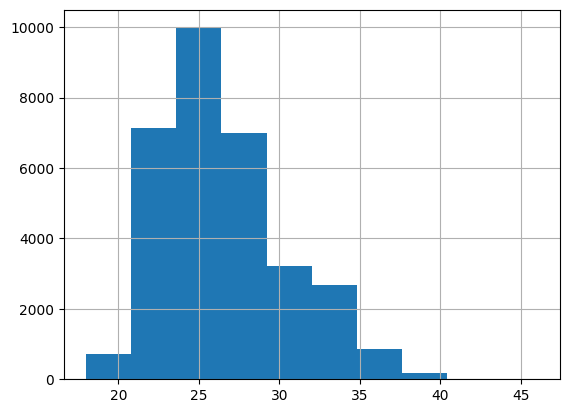

In [ ]:
player_df['AGE'].hist()

How many teams do we even have?

In [ ]:
player_df['TEAM'].unique().tolist()

['MIL',
 'DAL',
 'ATL',
 'DEN',
 'HOU',
 'IND',
 'OKC',
 'CHI',
 'ORL',
 'BOS',
 'TOT',
 'DET',
 'NYK',
 'LAL',
 'SAC',
 'MIA',
 'CHO',
 'LAC',
 'GSW',
 'POR',
 'MIN',
 'WAS',
 'BRK',
 'MEM',
 'SAS',
 'PHO',
 'NOP',
 'UTA',
 'TOR',
 'PHI',
 'CLE',
 'CHA',
 'NOH',
 'NJN',
 'SEA',
 'NOK',
 'CHH',
 'VAN',
 'WSB',
 nan]

There's a rumour going round that younger players perform better. We just wanted to test it...

In [ ]:
correlation = player_df['AGE'].corr(player_df['FIELD_GOALS_MADE'])
print(correlation)

0.027280815763253866


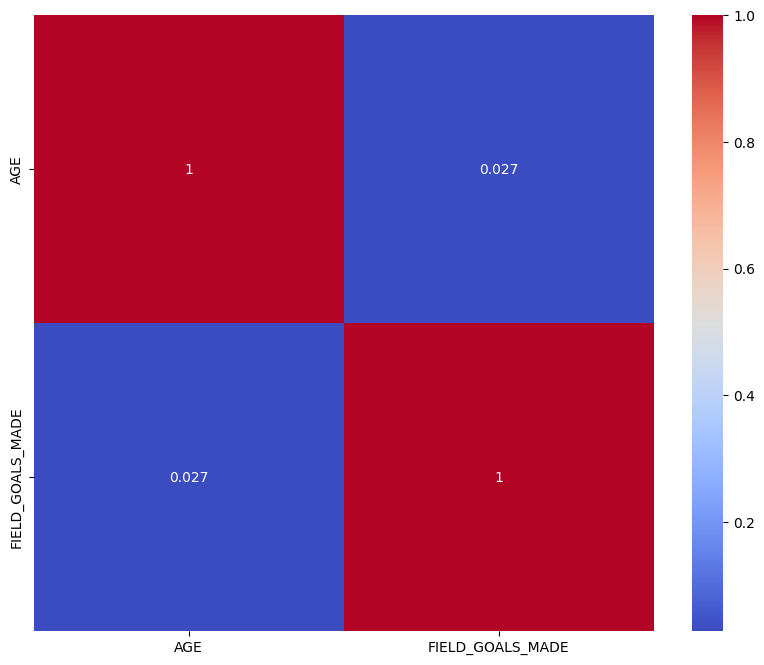

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(player_df[['AGE', 'FIELD_GOALS_MADE']].corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
df_opponent_stats_100=pd.read_csv('/content/drive/MyDrive/FINAL PROJECT CSVs/Opponent Stats Per 100 Poss.csv')
df_opponents_s_per_game=pd.read_csv('/content/drive/MyDrive/FINAL PROJECT CSVs/Opponent Stats Per Game.csv')
df_opponent_totals = pd.read_csv('/content/drive/MyDrive/FINAL PROJECT CSVs/Opponent Totals.csv')



In [ ]:
df_opponent_stats_100.shape

(1402, 28)

In [ ]:
df_opponents_s_per_game.shape

(1845, 28)

In [ ]:
df_opponent_totals.shape

(1845, 28)

In [ ]:
df_opponent_stats_100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1402 entries, 0 to 1401
Data columns (total 28 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   SEASON                                               1402 non-null   int64  
 1   LEAGUE                                               1402 non-null   object 
 2   TEAM_NAME                                            1402 non-null   object 
 3   TEAM_ABBREVIATION                                    1402 non-null   object 
 4   PLAYOFFS                                             1402 non-null   bool   
 5   GAMES                                                1402 non-null   int64  
 6   MINUTES_PLAYED                                       1402 non-null   int64  
 7   OPPONENT_FIELD_GOALS_PER_100_POSSESION               1402 non-null   float64
 8   OPPONENT_FIELD_GOALS_ATTEMPTED_PER_100_POSSESION     1402 non-null  

In [ ]:
df_opponents_s_per_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1845 entries, 0 to 1844
Data columns (total 28 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   SEASON                                      1845 non-null   int64  
 1   LEAGUE                                      1845 non-null   object 
 2   TEAM                                        1845 non-null   object 
 3   TEAM_ABBREAVIATION                          1758 non-null   object 
 4   PLAYOFFS                                    1845 non-null   bool   
 5   GAMES                                       1844 non-null   float64
 6   MINUTES_PLAYED_PER_GAME                     1655 non-null   float64
 7   OPPONENTS_FIELD_GOALS_PER_GAME              1605 non-null   float64
 8   OPPONENTS_FIELD_GOALS_Attempted_per_game    1605 non-null   float64
 9   OPPONENT_FIELD_GOALS_PERCENTAGE             1605 non-null   float64
 10  OPPONENTS_TH

In [ ]:
df_opponent_totals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1845 entries, 0 to 1844
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SEASON                              1845 non-null   int64  
 1   LEAGUE                              1845 non-null   object 
 2   TEAM                                1845 non-null   object 
 3   ABBREVIATION                        1758 non-null   object 
 4   PLAYOFFS                            1845 non-null   bool   
 5   GAMES                               1844 non-null   float64
 6   MINUTES_PLAYED                      1655 non-null   float64
 7   OPPONENT_FIELD_GOALS                1605 non-null   float64
 8   OPPONENT_FIELD_GOALS_ATTEMPTED      1605 non-null   float64
 9   OPPPONENT_FIELD_GOALS_PERCENTAGE    1605 non-null   float64
 10  OPPONENT_THREE_POINTERS             1402 non-null   float64
 11  OPPONENT_THREE_POINTERS_ATTEMPTED   1402 no

In [ ]:
del df_opponent_stats_100['TEAM_NAME']

In [ ]:
del df_opponent_totals['ABBREVIATION']

In [ ]:
def common_columns(dataframes):
    # Create a dictionary to count the occurrences of each column
    column_counts = {}

    # Iterate over all dataframes
    for df in dataframes:
        # Iterate over all columns in the current dataframe
        for col in df.columns:
            # If the column is already in the dictionary, increment its count
            if col in column_counts:
                column_counts[col] += 1
            # Otherwise, add the column to the dictionary with a count of 1
            else:
                column_counts[col] = 1

    # Return a list of columns that appear at least twice
    return [col for col, count in column_counts.items() if count >= 2]

In [ ]:
dfs2=[df_opponent_stats_100,df_opponents_s_per_game,df_opponent_totals]
# dfs is your list of dataframes
common_cols2 = common_columns(dfs2)
print(common_cols2)

['SEASON', 'LEAGUE', 'PLAYOFFS', 'GAMES', 'MINUTES_PLAYED', 'OPPONENT_FIELD_GOALS_PERCENTAGE', 'OPPONENT_THREE_POINTERS_PERCENTAGE', 'OPPONENT_TWO_POINTERS_PERCENTAGE', 'TEAM']


In [ ]:
m1 = pd.merge(df_opponent_stats_100, df_opponents_s_per_game, on =['SEASON', 'LEAGUE', 'PLAYOFFS', 'GAMES', 'OPPONENT_FIELD_GOALS_PERCENTAGE'], how ='left')
opponent_team_df = pd.merge(m1, df_opponent_totals, on =['SEASON', 'LEAGUE', 'PLAYOFFS', 'GAMES', 'MINUTES_PLAYED',  'OPPONENT_THREE_POINTERS_PERCENTAGE', 'OPPONENT_TWO_POINTERS_PERCENTAGE', 'TEAM'], how ='left')

opponent_team_df.describe()


,SEASON,GAMES,MINUTES_PLAYED,OPPONENT_FIELD_GOALS_PER_100_POSSESION,OPPONENT_FIELD_GOALS_ATTEMPTED_PER_100_POSSESION,OPPONENT_FIELD_GOALS_PERCENTAGE,OPPONENT_THREE_POINTERS_PER_100_POSSESION,OPPONENT_THREE_POINTERS_ATTEMPTED_PER_100_POSSESION,OPPONENT_THREE_POINTERS_PERCENTAGE,OPPONENT_TWO_POINTER_PER_100_POSSESION,...,OPPONENT_FREE_THROW_PERCENTAGE,OPPONENTS_OFFENSIVE_REBOUND,OPPONENTS_DEFENSIVE_REBOUND,OPPONENTS_TOTAL_REBOUND,OPPONENTS_ASSIST,OPPONENTS_STEALS,OPPONENTS_BLOCKS,OPPONENTS_TURNOVERS,OPPONENTS_PERSONAL_FOUL,OPPONENTS_POINTS
count,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1673.000000,1673.000000,1673.000000,1817.000000,...,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000
mean,2000.765548,80.104568,19360.209136,40.553990,87.672262,0.462651,6.096533,17.246742,0.338803,34.940451,...,0.757070,999.862020,2463.342817,3463.204836,1871.770270,649.174964,401.936700,1268.086771,1786.110953,8281.305121
std,14.414455,6.636741,1605.170296,1.894964,2.328820,0.019595,3.698137,9.985400,0.038049,4.564443,...,0.017028,195.102932,277.961134,381.363989,256.438149,103.089005,70.476009,233.622830,264.816083,927.387201
min,1974.000000,11.000000,2640.000000,34.900000,78.000000,0.402000,0.200000,1.500000,0.115000,23.700000,...,0.694000,176.000000,360.000000,536.000000,255.000000,100.000000,53.000000,185.000000,273.000000,1138.000000
25%,1989.000000,82.000000,19755.000000,39.200000,86.200000,0.450000,2.800000,8.400000,0.329000,31.300000,...,0.746000,868.000000,2345.000000,3350.000000,1736.250000,589.250000,357.000000,1130.000000,1653.000000,7942.000000
50%,2002.000000,82.000000,19805.000000,40.600000,87.800000,0.462000,6.100000,17.300000,0.349000,33.900000,...,0.757000,1000.500000,2479.500000,3497.000000,1892.000000,648.000000,403.000000,1246.000000,1808.000000,8421.500000
75%,2013.000000,82.000000,19855.000000,41.800000,89.200000,0.475000,8.200000,22.800000,0.363000,39.300000,...,0.768000,1146.000000,2631.750000,3661.750000,2046.750000,714.000000,446.750000,1404.000000,1965.750000,8821.000000
max,2024.000000,84.000000,20460.000000,47.000000,95.500000,0.536000,14.700000,40.500000,0.411000,46.300000,...,0.816000,1662.000000,3154.000000,4750.000000,2537.000000,955.000000,654.000000,1980.000000,2453.000000,10723.000000


In [ ]:
opponent_team_df.shape

(1817, 69)

In [ ]:
opponent_team_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1817 entries, 0 to 1816
Data columns (total 69 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   SEASON                                               1817 non-null   int64  
 1   LEAGUE                                               1817 non-null   object 
 2   TEAM_ABBREVIATION                                    1817 non-null   object 
 3   PLAYOFFS                                             1817 non-null   bool   
 4   GAMES                                                1817 non-null   int64  
 5   MINUTES_PLAYED                                       1817 non-null   int64  
 6   OPPONENT_FIELD_GOALS_PER_100_POSSESION               1817 non-null   float64
 7   OPPONENT_FIELD_GOALS_ATTEMPTED_PER_100_POSSESION     1817 non-null   float64
 8   OPPONENT_FIELD_GOALS_PERCENTAGE                      1817 non-null  

In [ ]:
del opponent_team_df['TEAM_ABBREAVIATION']

In [ ]:
opponent_team_df.columns.tolist()

['SEASON',
 'LEAGUE',
 'TEAM_ABBREVIATION',
 'PLAYOFFS',
 'GAMES',
 'MINUTES_PLAYED',
 'OPPONENT_FIELD_GOALS_PER_100_POSSESION',
 'OPPONENT_FIELD_GOALS_ATTEMPTED_PER_100_POSSESION',
 'OPPONENT_FIELD_GOALS_PERCENTAGE',
 'OPPONENT_THREE_POINTERS_PER_100_POSSESION',
 'OPPONENT_THREE_POINTERS_ATTEMPTED_PER_100_POSSESION',
 'OPPONENT_THREE_POINTERS_PERCENTAGE',
 'OPPONENT_TWO_POINTER_PER_100_POSSESION',
 'OPPONENT_TWO_POINTERS_ATTEMPTED_PER_100_POSSESION',
 'OPPONENT_TWO_POINTERS_PERCENTAGE',
 'OPPONENT_FREE_THROWS_PER_100_POSSESION',
 'OPPONENT_FREE_THROWS_ATTEMPTED_PER_100_POSSESION',
 'OPPONENT_FREE_THROWS_PERCENTAGE',
 'OPPONENT_OFFENSIVE_REBOUND_PER_100_POSSESION',
 'OPPONENT_DEFENSIVE_REBOUND_PER_100_POSSESION',
 'OPPONENT_TOTAL_REBOUND_PER_100_POSSESION',
 'OPPONENT_ASSIST_PER_100_POSSESION',
 'OPPONENT_STEAL_PER_100_POSSESION',
 'OPPONENT_STEAL_PER_100_POSSESION.1',
 'OPPONENT_TURNOVER_PER_100_POSSESION',
 'OPPONENT_PERSONAL_FOUL_PER_100_POSSESION',
 'OPPONENT_POINTS_PER_100_POSSESI

In [ ]:
opponent_team_df = opponent_team_df.drop([
 'LEAGUE',
 'OPPONENT_FIELD_GOALS_PER_100_POSSESION',
 'OPPONENT_FIELD_GOALS_ATTEMPTED_PER_100_POSSESION',
 'OPPONENT_FIELD_GOALS_PERCENTAGE',
 'OPPONENT_THREE_POINTERS_PER_100_POSSESION',
 'OPPONENT_THREE_POINTERS_ATTEMPTED_PER_100_POSSESION',
 'OPPONENT_THREE_POINTERS_PERCENTAGE',
 'OPPONENT_TWO_POINTER_PER_100_POSSESION',
 'OPPONENT_TWO_POINTERS_ATTEMPTED_PER_100_POSSESION',
 'OPPONENT_TWO_POINTERS_PERCENTAGE',
 'OPPONENT_FREE_THROWS_PER_100_POSSESION',
 'OPPONENT_FREE_THROWS_ATTEMPTED_PER_100_POSSESION',
 'OPPONENT_FREE_THROWS_PERCENTAGE',
 'OPPONENT_OFFENSIVE_REBOUND_PER_100_POSSESION',
 'OPPONENT_DEFENSIVE_REBOUND_PER_100_POSSESION',
 'OPPONENT_TOTAL_REBOUND_PER_100_POSSESION',
 'OPPONENT_ASSIST_PER_100_POSSESION',
 'OPPONENT_STEAL_PER_100_POSSESION',
 'OPPONENT_STEAL_PER_100_POSSESION.1',
 'OPPONENT_TURNOVER_PER_100_POSSESION',
 'OPPONENT_PERSONAL_FOUL_PER_100_POSSESION',
 'OPPONENT_POINTS_PER_100_POSSESION',
 'MINUTES_PLAYED_PER_GAME',
 'PPONENTS_THREE_POINTERS_ATTEMPTED_PER_GAME',
 'OPPONENTS_TWO_POINTERS_ATTEMPTED_PER_GAME',
 'OPPONENTS_FREE_THROWS_ATTEMPTED_PER_GAME',
 'OPPONENTS_OFFENSIVE_REBOUND_PER_GAME',
 'OPPONENTS_DEFENSIVE_REBOUND_PER_GAME',
 'OPPONENT_THREE_POINTERS_ATTEMPTED',
 'OPPONENT_TWO_POINTERS_ATTEMPTED',
 'OPPONENT_FREE_THROW_PERCENTAGE',
 ], axis=1)

In [ ]:
opponent_team_df.fillna(0, inplace=True)

In [ ]:
opponent_team_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1817 entries, 0 to 1816
Data columns (total 37 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   SEASON                                    1817 non-null   int64  
 1   TEAM_ABBREVIATION                         1817 non-null   object 
 2   PLAYOFFS                                  1817 non-null   bool   
 3   GAMES                                     1817 non-null   int64  
 4   MINUTES_PLAYED                            1817 non-null   int64  
 5   TEAM                                      1817 non-null   object 
 6   OPPONENTS_FIELD_GOALS_PER_GAME            1817 non-null   float64
 7   OPPONENTS_FIELD_GOALS_Attempted_per_game  1817 non-null   float64
 8   OPPONENTS_THREE_POINTERS_PER_GAME         1817 non-null   float64
 9   OPPONENTS_THREE_POINTERS_PERCENTAGE       1817 non-null   float64
 10  OPPONENTS_TWO_POINTERS_PER_GAME     

In [ ]:
opponent_team_df = opponent_team_df.rename(columns={'OPPONENTSBLOCKS_PER_GAME': 'OPPONENTS_BLOCKS_PER_GAME'})

In [ ]:
opponent_team_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1817 entries, 0 to 1816
Data columns (total 37 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   SEASON                                    1817 non-null   int64  
 1   TEAM_ABBREVIATION                         1817 non-null   object 
 2   PLAYOFFS                                  1817 non-null   bool   
 3   GAMES                                     1817 non-null   int64  
 4   MINUTES_PLAYED                            1817 non-null   int64  
 5   TEAM                                      1817 non-null   object 
 6   OPPONENTS_FIELD_GOALS_PER_GAME            1817 non-null   float64
 7   OPPONENTS_FIELD_GOALS_Attempted_per_game  1817 non-null   float64
 8   OPPONENTS_THREE_POINTERS_PER_GAME         1817 non-null   float64
 9   OPPONENTS_THREE_POINTERS_PERCENTAGE       1817 non-null   float64
 10  OPPONENTS_TWO_POINTERS_PER_GAME     

In [ ]:
opponent_team_df['SEASON'].unique()

array([2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014,
       2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003,
       2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992,
       1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981,
       1980, 1979, 1978, 1977, 1976, 1975, 1974])

In [ ]:
opponent_team_df['TEAM'].unique()

array(['Atlanta Hawks', 'Boston Celtics', 'Brooklyn Nets',
       'Chicago Bulls', 'Charlotte Hornets', 'Cleveland Cavaliers',
       'Dallas Mavericks', 'Denver Nuggets', 'Detroit Pistons',
       'Portland Trail Blazers', 'Golden State Warriors',
       'Houston Rockets', 'Indiana Pacers', 'Los Angeles Clippers',
       'Los Angeles Lakers', 'Memphis Grizzlies', 'Miami Heat',
       'Milwaukee Bucks', 'Minnesota Timberwolves',
       'New Orleans Pelicans', 'New York Knicks', 'Oklahoma City Thunder',
       'Orlando Magic', 'Philadelphia 76ers', 'Phoenix Suns',
       'Sacramento Kings', 'San Antonio Spurs', 'Toronto Raptors',
       'Utah Jazz', 'Washington Wizards', 'League Average',
       'Charlotte Bobcats', 'New Orleans Hornets', 'New Jersey Nets',
       'Seattle SuperSonics', 'New Orleans/Oklahoma City Hornets',
       'Vancouver Grizzlies', 'Washington Bullets', 'Kansas City Kings',
       'San Diego Clippers', 'New Orleans Jazz', 'Buffalo Braves',
       'New York Nets', 'K

Although this DataFrame didn't significantly influence our final model, we took a moment to investigate whether there was a substantial variance in the number of injured players per team. We hypothesized that this might impact a team's overall performance and, consequently, their likelihood of winning. It's worth noting that the available data only covers a decade (2010-2020).

In [ ]:
injuries_df = pd.read_csv('/content/drive/MyDrive/FINAL PROJECT CSVs/injuries_2010-2020.csv')

In [ ]:
injuries_df.shape

(27105, 5)

In [ ]:
injuries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27105 entries, 0 to 27104
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DATE          27105 non-null  object
 1   TEAM          27103 non-null  object
 2   ACQUIRED      9542 non-null   object
 3   RELINQUISHED  17560 non-null  object
 4   NOTES         27105 non-null  object
dtypes: object(5)
memory usage: 1.0+ MB


In [ ]:
injuries_df['TEAM'].unique()

array(['Bulls', 'Pistons', 'Blazers', 'Nets', 'Nuggets', 'Bucks', 'Kings',
       'Bobcats', 'Warriors', 'Suns', 'Heat', 'Thunder', 'Timberwolves',
       'Celtics', 'Lakers', 'Rockets', '76ers', 'Cavaliers', 'Clippers',
       'Grizzlies', 'Hawks', 'Hornets', 'Jazz', 'Knicks', 'Mavericks',
       'Pacers', 'Raptors', 'Spurs', 'Magic', 'Wizards', 'Pelicans', nan,
       'Bullets'], dtype=object)

In [ ]:
injuries_df['TEAM'].value_counts()

TEAM
Spurs           1163
Bucks           1068
Warriors        1060
Rockets         1058
Raptors         1044
Celtics         1040
Nets            1024
Heat            1023
Cavaliers       1001
Mavericks        992
Hawks            975
Nuggets          966
Lakers           959
Knicks           943
76ers            910
Wizards          875
Grizzlies        875
Timberwolves     860
Jazz             841
Magic            834
Pacers           831
Bulls            791
Suns             733
Kings            728
Hornets          719
Clippers         718
Thunder          717
Pistons          714
Blazers          695
Pelicans         576
Bobcats          369
Bullets            1
Name: count, dtype: int64

In [ ]:
pd.crosstab(index=injuries_df['TEAM'], columns="count")

col_0,count
TEAM,
76ers,910
Blazers,695
Bobcats,369
Bucks,1068
Bullets,1
Bulls,791
Cavaliers,1001
Celtics,1040
Clippers,718


A visual representation of the distribution of wounded players across teams.

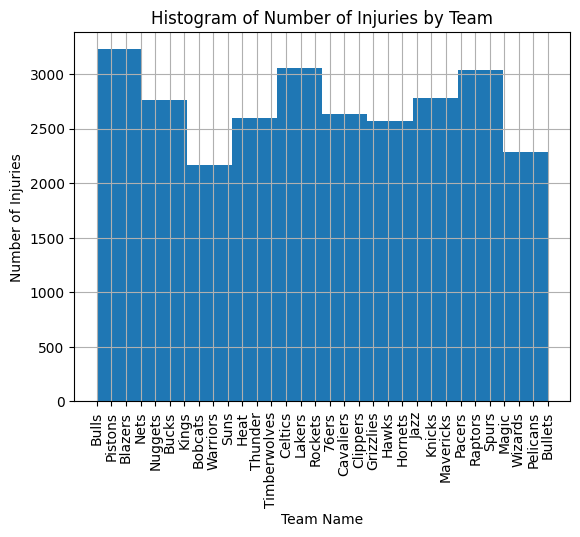

In [ ]:
injuries_df['TEAM'].hist()
plt.xlabel('Team Name')
plt.ylabel('Number of Injuries')
plt.title('Histogram of Number of Injuries by Team')
plt.xticks(rotation='vertical')
plt.show()

As we delve into the draft_history dataset with df_draft_history.info(), we’re getting a glimpse of the different chapters of this story. Each column represents a different aspect of the draft history,including the number of non-null entries in each column and the data type of each column.
The df_draft_history.head()  It gives us a sneak peek into the data.

In [ ]:
df_draft_history = pd.read_csv('/content/drive/MyDrive/FINAL PROJECT CSVs/draft_history.csv')
df_draft_combine_stats =pd.read_csv('/content/drive/MyDrive/FINAL PROJECT CSVs/draft_combine_stats.csv')

In [ ]:
df_draft_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7990 entries, 0 to 7989
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   PERSON_ID            7990 non-null   int64 
 1   PLAYER_NAME          7990 non-null   object
 2   SEASON               7990 non-null   int64 
 3   ROUND_NUMBER         7990 non-null   int64 
 4   ROUND_PICK           7990 non-null   int64 
 5   OVERALL_PICK         7990 non-null   int64 
 6   DRAFT_TYPE           7990 non-null   object
 7   TEAM_ID              7990 non-null   int64 
 8   TEAM_CITY            7990 non-null   object
 9   TEAM_NAME            7990 non-null   object
 10  TEAM_ABBREVIATION    7990 non-null   object
 11  ORGANIZATION         7971 non-null   object
 12  ORGANIZATION_TYPE    7971 non-null   object
 13  PLAYER_PROFILE_FLAG  7990 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 874.0+ KB


In [ ]:
df_draft_combine_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 47 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   SEASON                            1202 non-null   int64  
 1   PLAYER_ID                         1202 non-null   int64  
 2   FIRST_NAME                        1202 non-null   object 
 3   LAST_NAME                         1202 non-null   object 
 4   PLAYER_NAME                       1202 non-null   object 
 5   POSITION                          1197 non-null   object 
 6   HEIGHT_WITHOUT_SHOEAS             1153 non-null   float64
 7   HEIGHT_WITHOUT_SHOES_FEET_INCHES  1153 non-null   object 
 8   HEIGHT_WITH_SHOES                 1008 non-null   float64
 9   HEIGHT_WITH_SHOES_FEET_INCHES     1008 non-null   object 
 10  WEIGHT                            1152 non-null   float64
 11  WINGSPAN                          1153 non-null   float64
 12  WINGSP

In [ ]:
df_draft_history.head()

,PERSON_ID,PLAYER_NAME,SEASON,ROUND_NUMBER,ROUND_PICK,OVERALL_PICK,DRAFT_TYPE,TEAM_ID,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,ORGANIZATION,ORGANIZATION_TYPE,PLAYER_PROFILE_FLAG
0,79299,Clifton McNeeley,1947,1,1,1,Draft,1610610031,Pittsburgh,Ironmen,PIT,Texas-El Paso,College/University,0
1,78109,Glen Selbo,1947,1,2,2,Draft,1610610035,Toronto,Huskies,HUS,Wisconsin,College/University,1
2,76649,Eddie Ehlers,1947,1,3,3,Draft,1610612738,Boston,Celtics,BOS,Purdue,College/University,1
3,79302,Walt Dropo,1947,1,4,4,Draft,1610610032,Providence,Steamrollers,PRO,Connecticut,College/University,0
4,77048,Dick Holub,1947,1,5,5,Draft,1610612752,New York,Knicks,NYK,Long Island-Brooklyn,College/University,1


In [ ]:
df_draft_combine_stats.head()

,SEASON,PLAYER_ID,FIRST_NAME,LAST_NAME,PLAYER_NAME,POSITION,HEIGHT_WITHOUT_SHOEAS,HEIGHT_WITHOUT_SHOES_FEET_INCHES,HEIGHT_WITH_SHOES,HEIGHT_WITH_SHOES_FEET_INCHES,...,SPOT_NBA_BREAK_RIGHT,SPOT_NBA_CORNER_RIGHT,OFF_DRIBBLE_FIFTEEN_BREAK_LEFT,OFF_DRIBBLE_FIFTEEN_TOP_KEY,OFF_DRIBBLE_FIFTEEN_BREAK_RIGHT,OFF_DRIBBLE_COLLEGE_BREAK_LEFT,OFF_DRIBBLE_COLLEGE_TOP-KEY,OFF_DRIBBLE_COLLEGE_BREAK_RIGHT,ON_MOVE_FIFTEEN,ON_MOVE_COLLEGE
0,2001,12033,Adam,Allenspach,Adam Allenspach,C,83.50,6' 11.5'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001,2240,Gilbert,Arenas,Gilbert Arenas,SG,74.25,6' 2.25'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001,2220,Brandon,Armstrong,Brandon Armstrong,SG,75.50,6' 3.5'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2001,2203,Shane,Battier,Shane Battier,SF-PF,80.25,6' 8.25'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2001,12034,Cookie,Belcher,Cookie Belcher,SG-PG,75.00,6' 3'',NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now, the plot thickens. This line is like a leaderboard, ranking the top 20 organizations based on their frequency in the draft history. It’s a testament to their consistent presence and impact in the drafts.


In [ ]:
top_20_organizations = df_draft_history['ORGANIZATION'].value_counts().head(20)
print(top_20_organizations)


ORGANIZATION
Kentucky                  137
California-Los Angeles    120
North Carolina            115
Duke                      105
Kansas                     87
Indiana                    77
Arizona                    74
Louisville                 73
Michigan                   73
Maryland                   72
Illinois                   71
Syracuse                   69
North Carolina State       66
Notre Dame                 63
Southern California        62
Villanova                  61
St. John's (NY)            61
Washington                 60
Michigan State             60
Marquette                  58
Name: count, dtype: int64


But what about the underdogs? df_draft_history['ORGANIZATION'].value_counts().tail(20) gives us insight into the organizations that have had less representation in the drafts. This could be the beginning of their journey to rise through the ranks.

In [ ]:
df_draft_history['ORGANIZATION'].value_counts().tail(20)

ORGANIZATION
West Alabama                  1
Bloomsburg                    1
Southern Utah                 1
Juvecaserta Basket (Italy)    1
Calgary (CAN)                 1
Longwood                      1
Eastern Oregon                1
Florida International         1
Massachusetts Boston          1
California-Davis              1
Hellenic                      1
Lawrence                      1
Alabama A&M                   1
Pratt                         1
Williams                      1
Caltech                       1
McMurry                       1
York (CAN)                    1
Indiana Wesleyan              1
Belhaven                      1
Name: count, dtype: int64

The print(df_draft_history['OVERALL_PICK'].value_counts()) command is like a roll call, tallying up the frequency of each overall pick number. It’s a snapshot of the distribution of picks across the drafts.


In [ ]:
print(df_draft_history['OVERALL_PICK'].value_counts())

OVERALL_PICK
0      655
1       74
2       74
3       74
4       74
      ... 
232      2
231      2
230      2
238      1
239      1
Name: count, Length: 240, dtype: int64


Next, we turn our attention to the top 20 organizations This line is calculating the average overall pick for each of these organizations, shedding light on their typical standing in the drafts.

The bar graph that follows paints a vivid picture of this data. It’s a visual representation of the average overall pick by the top 20 organizations, allowing us to easily compare and contrast their performances.

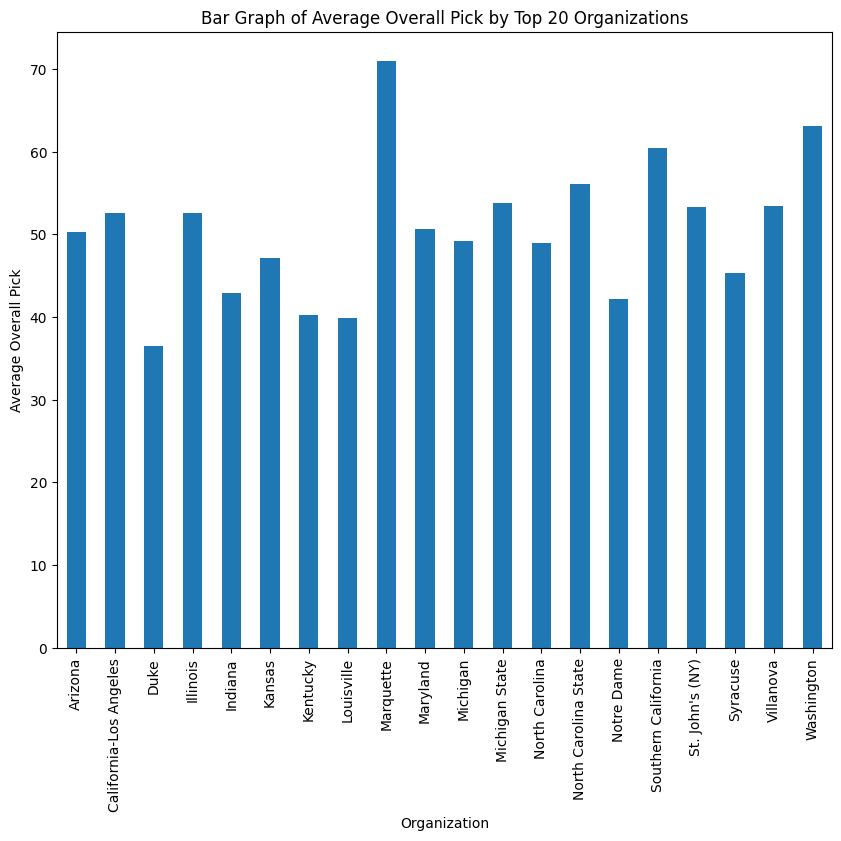

In [ ]:
top_20_orgs = df_draft_history['ORGANIZATION'].value_counts().index[:20]


average_pick = df_draft_history[df_draft_history['ORGANIZATION'].isin(top_20_orgs)].groupby('ORGANIZATION')['OVERALL_PICK'].mean()

plt.figure(figsize=(10,8))
average_pick.plot(kind='bar')
plt.xlabel('Organization')
plt.ylabel('Average Overall Pick')
plt.title('Bar Graph of Average Overall Pick by Top 20 Organizations')
plt.xticks(rotation=90)
plt.show()

Finally, we zoom in on the coveted first overall pick. This line is spotlighting the entries where the overall pick was 1, the pinnacle of achievement in the drafts.

The pie chart at the end of your code is the grand finale. It showcases the top 10 organizations that have had the honor of the first overall pick the most times, with all other organizations grouped into an ‘Other’ category. It’s a tribute to their success and a testament to their dominance in the drafts.

This could lead to further questions and investigations, such as looking into why those organizations have those patterns (e.g., more successful scouting, better player development, etc.).

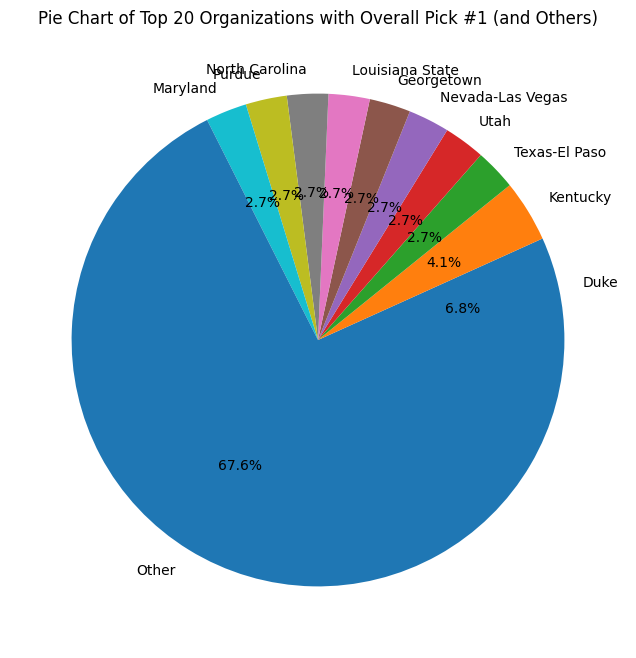

In [ ]:
df_overall_pick_1 = df_draft_history[df_draft_history['OVERALL_PICK'] == 1]

org_counts = df_overall_pick_1['ORGANIZATION'].value_counts()

# Get the top 20 organizations
top_20_orgs_counts = org_counts.nlargest(10)

# Add a new category for all other organizations
top_20_orgs_counts['Other'] = org_counts[10:].sum()

plt.figure(figsize=(10,8))  # Adjust the size as necessary
plt.pie(top_20_orgs_counts, labels=top_20_orgs_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of Top 20 Organizations with Overall Pick #1 (and Others)')
plt.show()

In [ ]:
all_star = pd.read_csv('/content/drive/MyDrive/FINAL PROJECT CSVs/All-Star Selections.csv')

In [ ]:
all_star.shape

(2000, 5)

In [ ]:
all_star.describe()

,SEASON
count,2000.000000
mean,1987.016000
std,20.730307
min,1951.000000
25%,1970.000000
50%,1985.000000
75%,2005.250000
max,2024.000000


In [ ]:
all_star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   PLAYER    2000 non-null   object
 1   TEAM      2000 non-null   object
 2   LEAGUE    2000 non-null   object
 3   SEASON    2000 non-null   int64 
 4   REPLACED  2000 non-null   bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 64.6+ KB


In [ ]:
all_star.head()

,PLAYER,TEAM,LEAGUE,SEASON,REPLACED
0,Bam Adebayo,East,NBA,2024,False
1,Giannis Antetokounmpo,East,NBA,2024,False
2,Paolo Banchero,East,NBA,2024,False
3,Scottie Barnes,East,NBA,2024,False
4,Jaylen Brown,East,NBA,2024,False


In [ ]:
all_star.tail()

,PLAYER,TEAM,LEAGUE,SEASON,REPLACED
1995,Alex Groza,West,NBA,1951,False
1996,George Mikan,West,NBA,1951,False
1997,Vern Mikkelsen,West,NBA,1951,False
1998,Jim Pollard,West,NBA,1951,False
1999,Fred Schaus,West,NBA,1951,False


In [ ]:
all_star['TEAM'].value_counts()

TEAM
East            909
West            907
Team LeBron      67
Team Durant      29
Team Giannis     26
LeBron           14
Giannis          13
Team Stephen     12
All Stars        12
Denver           11
Name: count, dtype: int64

In [ ]:
all_star = all_star[all_star['TEAM'] != 'Denver']


In [ ]:
all_star['TEAM'].value_counts()

TEAM
East            909
West            907
Team LeBron      67
Team Durant      29
Team Giannis     26
LeBron           14
Giannis          13
Team Stephen     12
All Stars        12
Name: count, dtype: int64

In [ ]:
all_star['PLAYER'].value_counts()

PLAYER
LeBron James           20
Kareem Abdul-Jabbar    19
Kobe Bryant            18
Julius Erving          16
Tim Duncan             15
                       ..
Michael Redd            1
Kenyon Martin           1
Jamaal Magloire         1
Metta World Peace       1
Fred Schaus             1
Name: count, Length: 520, dtype: int64

The bar plot is a visual representation of the player counts, allowing us to easily compare and contrast their performances. It’s like a hall of fame, honoring the players who have made it to the All-Star game the most times. This could lead to further questions and investigations, such as looking into why those players are frequently selected (e.g., outstanding performance, popularity, etc.).

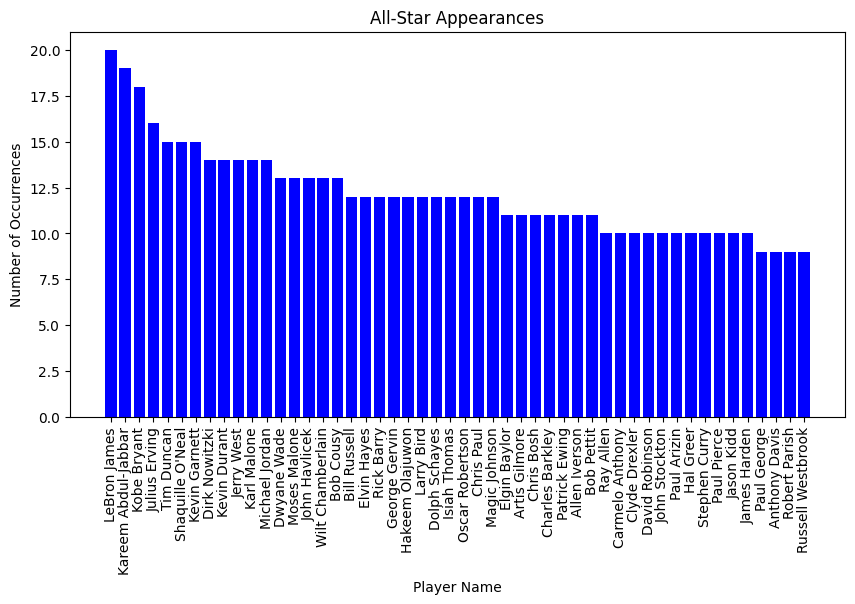

In [ ]:
team_counts = all_star['PLAYER'].value_counts().sort_values(ascending=False).head(50)

plt.figure(figsize=(10, 5))
#plt.pie(team_counts, labels=team_counts.index, autopct='%1.1f%%')
plt.bar(team_counts.index, team_counts.values, color='b')
plt.xlabel('Player Name')
plt.ylabel('Number of Occurrences')
plt.title('All-Star Appearances')
plt.xticks(rotation='vertical')

plt.show()

We'll now deal with teh Teams dataframes

In [ ]:






















#Importing all dataframes for the teams that will be needed to create a unified team dataframe
teams_df = pd.read_csv("drive/MyDrive/FINAL PROJECT CSVs/teams.csv") #ONLY HAS BASIC INFO
team_totals_df = pd.read_csv("drive/MyDrive/FINAL PROJECT CSVs/Team Totals.csv")
team_sum_df = pd.read_csv("drive/MyDrive/FINAL PROJECT CSVs/Team Summaries.csv")
team_statPG_df = pd.read_csv("drive/MyDrive/FINAL PROJECT CSVs/Team Stats Per Game.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'drive/MyDrive/FINAL PROJECT CSVs/teams.csv'

In [ ]:
print(team_sum_df.shape)

In [ ]:
print(team_sum_df.notnull().sum())

In [ ]:
# Do a left merge on the dataframes on SEASON, LEAGUE, and TEAM columns
# This is done to assert all dataframes have a corresponding win and loss column
team_totals_df = pd.merge(team_totals_df, team_sum_df[['SEASON', 'LEAGUE', 'TEAM', 'W', 'L']], on=['SEASON', 'LEAGUE', 'TEAM'], how='left')

# Display the merged dataframe
print(team_totals_df.notnull().sum())

In [ ]:
# Do a left merge on the dataframes on SEASON, LEAGUE, and TEAM columns
# This is done to assert all dataframes have a corresponding win and loss column
team_statPG_df = pd.merge(team_statPG_df, team_sum_df[['SEASON', 'LEAGUE', 'TEAM', 'W', 'L']], on=['SEASON', 'LEAGUE', 'TEAM'], how='left')

# Display the merged dataframe
print(team_statPG_df.notnull().sum())

We'll now do a Heatmap to determine which variables are mostly related with the number of Wins versus Loss



In [ ]:
# Calculate the correlation matrix
correlation_matrix = team_sum_df.corr(numeric_only=True)

# Plotting the heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
#plt.show()

# Sorting correlations with respect to 'W' (Wins) and 'L' (Losses)
correlation_with_wins = correlation_matrix['W'].sort_values(ascending=False)
correlation_with_losses = correlation_matrix['L'].sort_values(ascending=False)

print("Correlation with Wins:")
print(correlation_with_wins)

print("\nCorrelation with Losses:")
print(correlation_with_losses)

In [ ]:
team_sum_df.drop(columns=['FREE_THROWS_PER_FIELD_GOAL_ATTEMPT', 'OPPONENT_DEFENSIVE_REBOUND_PERCENTAGE',
                          'OFFENSIVE_REBOUND_PERCENTAGE', 'FREE_THROW_Rate',
                          'OPPONENT_FREE_THROW_PERCENTAGE', 'PACE',
                          'ARENA', 'ATTEND', 'ATTEND_G',
                          'THREE_POINTER_ATTEMPT_RATE'], inplace=True)

print(team_sum_df.notnull().sum())


In [ ]:
#Drop rows where columns have just a few missing value

team_sum_df.dropna(subset=['W', 'L'], inplace=True)
print(team_sum_df.notnull().sum())

In [ ]:
#Impute values based on teams with the same name

imputer = SimpleImputer(strategy='mean')
# Define the columns to impute
columns_to_impute = ['AGE', 'DEFENSIVE_RATING', 'OFFENSIVE_RATING', 'NET_RATING',
                     'OPPONENT_EFFECTIVE_FIELD_GAL',
                     'OPPONENT_FREE_THROW_PERCENTAGE.1',
                     'TURNOVER_PERCENTAGE']

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Iterate over each column to impute
for column in columns_to_impute:
    # Group by 'TEAM' and apply the imputer to each group
    team_sum_df[column] = team_sum_df.groupby('TEAM')[column].transform(
        lambda x: imputer.fit_transform(x.values.reshape(-1, 1)).ravel() if x.notnull().any() else x
    )

# Print the count of non-null values after imputation
print(team_sum_df.notnull().sum())

In [ ]:
#Drop rows where teams did not have any data to help with imputation

team_sum_df.dropna(subset=['AGE', 'TURNOVER_PERCENTAGE', 'OPPONENT_EFFECTIVE_FIELD_GAL',
                           'OPPONENT_FREE_THROW_PERCENTAGE.1'], inplace=True)
print(team_sum_df.notnull().sum())

In [ ]:
print(team_totals_df.shape)


In [ ]:
print(team_totals_df.notnull().sum())

In [ ]:
# Doing a Heatmap to determine which variables are mostly related with the number of Wins versus Loss, again

# Calculate the correlation matrix
correlation_matrix = team_totals_df.corr(numeric_only=True)

# Plotting the heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Sorting correlations with respect to 'W' (Wins) and 'L' (Losses)
correlation_with_wins = correlation_matrix['W'].sort_values(ascending=False)
correlation_with_losses = correlation_matrix['L'].sort_values(ascending=False)

print("Correlation with Wins:")
print(correlation_with_wins)

print("\nCorrelation with Losses:")
print(correlation_with_losses)

In [ ]:
#Drop Columns we might not use

team_totals_df.drop(columns=['THREE_POINTERS_PERCENTAGE', 'TWO_POINTERS_ATTEMPTED',
                             'OFFENSIVE_REBOUND', 'PERSONAL FOULS', 'THREE_POINTERS_MADE',
                             'THREE_POINTERS_ATTEMPTED',
                          ], inplace=True)

print(team_totals_df.notnull().sum())


In [ ]:
#Drop rows where columns have just a few missing value
team_totals_df.dropna(subset=['W', 'L'], inplace=True)

print(team_totals_df.notnull().sum())

In [ ]:
#Impute values based on teams with the same name, and in the same season

#Impute values based on teams with the same name
imputer = SimpleImputer(strategy='mean')

# Define the columns to impute
columns_to_impute = ['MINUTES_PLAYED', 'DEFENSIVE_REBOUND', 'TOTAL_REBOUNDS', 'STEALS', 'BLOCKS', 'TURNOVERS']

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Iterate over each column to impute
for column in columns_to_impute:
    # Group by 'TEAM' and apply the imputer to each group
    team_totals_df[column] = team_totals_df.groupby('TEAM')[column].transform(
        lambda x: imputer.fit_transform(x.values.reshape(-1, 1)).ravel() if x.notnull().any() else x
    )

# Print the count of non-null values after imputation
print(team_totals_df.notnull().sum())

In [ ]:
#Drop rows where teams did not have any data to help with imputation

team_totals_df.dropna(subset=['MINUTES_PLAYED', 'DEFENSIVE_REBOUND', 'TOTAL_REBOUNDS'], inplace=True)
print(team_totals_df.notnull().sum())

In [ ]:
# Fill null values in 'STEALS' and 'BLOCKS' columns with zero
team_totals_df['STEALS'].fillna(0, inplace=True)
team_totals_df['BLOCKS'].fillna(0, inplace=True)

# Check the count of non-null values after filling null values
print(team_totals_df.notnull().sum())

In [ ]:
#Dealing with the team_Stats_Per_Game
print(team_statPG_df.shape)

In [ ]:
print(team_statPG_df.notnull().sum())

In [ ]:
# Doing a Heatmap to determine which variables are mostly related with the number of
# Wins versus teh number of Loss


# Calculate the correlation matrix
correlation_matrix = team_statPG_df.corr(numeric_only=True)

# Plotting the heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
#plt.show()

# Sorting correlations with respect to 'W' (Wins) and 'L' (Losses)
correlation_with_wins = correlation_matrix['W'].sort_values(ascending=False)
correlation_with_losses = correlation_matrix['L'].sort_values(ascending=False)

print("Correlation with Wins:")
print(correlation_with_wins)

print("\nCorrelation with Losses:")
print(correlation_with_losses)

In [ ]:
team_statPG_df.dropna(subset=['W', 'L'], inplace=True)
print(team_statPG_df.notnull().sum())


In [ ]:
#Drop columns with low correlation
team_statPG_df.drop(columns=['TWO_POINTERS_PER_GAME', 'STEALS_PER_GAME',
                          'THREE_POINTER_POSITION', 'FREE_THROW_PER_GAME', 'FREE_THROW_AGAINST_PER_GAME',
                          'TOTAL_REBOUND_PER_GAME', 'THREE_POINTERS_PER_GAME',
                          'mp_per_game', 'FIELD_GOAL_AGAINST_PER_GAME', 'THREE_POINTERS_AGAINST_PER_GAME',
                          'TWO_POINTER_AGAINST_PER_GAME', 'OFFENSIVE_Rebound_per_game', 'TURNOVER_PER_GAME',
                          'PERSONAL_FOULS_PER_GAME'], inplace=True)

print(team_statPG_df.notnull().sum())


Here we are imputing using the mean not of teh entire dataframe but for each missing value, we impute with the mean of the corresponding team name.

In [ ]:
#Impute values based on teams with the same name
imputer = SimpleImputer(strategy='mean')

# Define the columns to impute
columns_to_impute = ['DEFENSIVE_REBOUND_PER_GAME', 'BLOCKS_PER_GAME']

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Iterate over each column to impute
for column in columns_to_impute:
    # Group by 'TEAM' and apply the imputer to each group
    team_statPG_df[column] = team_statPG_df.groupby('TEAM')[column].transform(
        lambda x: imputer.fit_transform(x.values.reshape(-1, 1)).ravel() if x.notnull().any() else x
    )

# Print the count of non-null values after imputation
print(team_statPG_df.notnull().sum())

In [ ]:
#Drop rows where teams did not have any data to help with imputation

team_statPG_df.dropna(subset=['DEFENSIVE_REBOUND_PER_GAME'], inplace=True)
print(team_statPG_df.notnull().sum())

In [ ]:
#Drop Columns Blocks_per_game as we already have Blocks in the team_summary df

team_statPG_df.drop(columns=['BLOCKS_PER_GAME'], inplace=True)

print(team_statPG_df.notnull().sum())


Merging the teams CSVs based on the year and teh team name (team_id is unfortunately not on all CSVs)

In [ ]:
# Initial merge (full outer join) between teams_df and team_totals_df
merged_team_df = pd.merge(team_totals_df, team_sum_df, on=['TEAM', 'SEASON'], how='outer')
merged_team_df = pd.merge(merged_team_df, team_statPG_df, on=['TEAM', 'SEASON'], how='outer')
merged_team_df.head(10)


In [ ]:
#Just sanity checking
print(team_totals_df.shape)
print(team_sum_df.shape)
print(team_statPG_df.shape)
print(merged_team_df.shape)

In [ ]:
merged_team_columns = merged_team_df.columns.tolist()
print(merged_team_columns)

In [ ]:
print(merged_team_df.notnull().sum())

In [ ]:
merged_team_df.dropna(subset=['W_x', 'L_x'], inplace=True)
print(merged_team_df.notnull().sum())

In [ ]:
#Drop repeating columns
merged_team_df.drop(columns=['W_x', 'W_x',
                          'W_y', 'L_y', 'FREE_THROW_PERCENTAGE_y', 'GAMES_y', 'LEAGUE_y',
                             'ABBREVIATION_y'], inplace=True)

print(merged_team_df.notnull().sum())

In [ ]:
# Doing a Heatmap to determine which variables are mostly related with the number of
# Wins versus teh number of Loss

# Calculate the correlation matrix
correlation_matrix = merged_team_df.corr(numeric_only=True)


# Plotting the heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# Sorting correlations with respect to 'W' (Wins) and 'L' (Losses)
correlation_with_wins = correlation_matrix['W'].sort_values(ascending=False)
correlation_with_losses = correlation_matrix['L'].sort_values(ascending=False)


print("Correlation with Wins:")
print(correlation_with_wins)


print("\nCorrelation with Losses:")
print(correlation_with_losses)

#Might still wanna drop TURNOVER_PERCENTAGE and FREE_THROW_PERCENTAGE_x

In [ ]:
merged_team_df.columns.tolist()

In [ ]:
#Working with the games CSVs

game_df = pd.read_csv("drive/MyDrive/FINAL PROJECT CSVs/game.csv")
games_df = pd.read_csv("drive/MyDrive/FINAL PROJECT CSVs/games.csv")
# upon examining the heatmap of teh relatioon between this datasets' columns and
# the team wins is very low. We will thus not be using it.
games_details_df = pd.read_csv("drive/MyDrive/FINAL PROJECT CSVs/games_details.csv")



In [ ]:
print(games_details_df.dtypes)

In [ ]:
#There are irregularities in the minutes format.

def convert_to_mmss(time_str):
    # Check if the value is NaN
    if pd.isna(time_str):
        return None  # Return None for missing values

    # Split time string into hours, minutes, and seconds
    parts = time_str.split(':')

    # Check if the parts list has only one element (minutes)
    if len(parts) == 1:
        minutes = parts[0]
        seconds = '00'  # Set seconds to '00'
    elif len(parts) >= 2:
        minutes = parts[-2]
        seconds = parts[-1]
    else:
        return None  # Return None if the format is not as expected

    # Concatenate minutes and seconds with a colon separator
    mm_ss_format = f"{minutes}:{seconds}"

    return mm_ss_format

# Apply the function to the 'MINUTES' column
games_details_df['MINUTES'] = games_details_df['MINUTES'].apply(convert_to_mmss)

print(games_details_df.dtypes)

In [ ]:
print(games_df.dtypes)

In [ ]:
print(game_df.dtypes)

In [ ]:
# Do a left merge on the dataframes on GAME_ID
# This is done to assert all dataframes have a corresponding win and loss column
game_df = pd.merge(game_df, games_df[['GAME_ID', 'HOME_TEAM_WINS']], on=['GAME_ID'], how='left')

# Display the merged dataframe
print(game_df.notnull().sum())

#For some reason, game has only a few matches for home team wins

In [ ]:
#This dataframe has been dropped
# Do a left merge on the dataframes on GAME_ID
# This is done to assert all dataframes have a corresponding win and loss column
games_details_df = pd.merge(games_details_df, games_df[['GAME_ID', 'HOME_TEAM_WINS']], on=['GAME_ID'], how='left')

# Display the merged dataframe
print(games_details_df.notnull().sum())

In [ ]:
# Doing a Heatmap to determine which variables are mostly related with the number of
# Home wins

# Calculate the correlation matrix
correlation_matrix = games_df.corr(numeric_only=True)


# Plotting the heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# Sorting correlations with respect to HOME_TEAM_WINS
correlation_with_wins = correlation_matrix['HOME_TEAM_WINS'].sort_values(ascending=False)


print("Correlation with HOME_TEAM_WINS:")
print(correlation_with_wins)


In [ ]:
#drop columns with a low correlation coefficient that is neither very positive nor very negative
games_df.drop(columns=['FREE_THROWS_PERCENTAGE_HOME', 'VISITOR_TEAM_ID',
                               'TEAM_ID_AWAY', 'FREE_THROWS_PERCENTAGE_AWAY',
                               ], inplace=True)
print(games_details_df.dtypes)

In [ ]:
print(games_df.notnull().sum())

In [ ]:
#Drop rows with no data

games_df.dropna(subset=['HOME_TEAM_WINS'], inplace=True)
print(games_df.notnull().sum())

In [ ]:
#Dealing with game_df
# Calculate the correlation between each independent variable and the dependent variable
correlation = game_df.corr(numeric_only=True)['HOME_TEAM_WINS'].abs().sort_values(ascending=False)

print(correlation)

In [ ]:
game_df.columns.tolist()

Finding the correlation when home win is positive (W). We are doing this given that game_df has more data (rows) than we have for the WIN_LOSS_HOME. Thus assuming based on just that correlation might be father from accurate

In [ ]:
# Replace 'W' with 1 and 'F' with 0 in the 'WIN_LOSS_HOME' column
game_df['WIN_LOSS_HOME'] = game_df['WIN_LOSS_HOME'].replace({'W': 1, 'L': 0})

# Drop rows where 'WIN_LOSS_HOME' is NaN
game_df = game_df.dropna(subset=['WIN_LOSS_HOME'])

# Convert the column to integer type
game_df['WIN_LOSS_HOME'] = game_df['WIN_LOSS_HOME'].astype(int)

# Calculate the correlation between 'WIN_LOSS_HOME' and each other column
#correlation_with_win = game_df.corr()['WIN_LOSS_HOME'].abs().sort_values(ascending=False)

# Display the correlation coefficients
game_df.head(10)


In [ ]:
# Calculate the correlation between 'WIN_LOSS_HOME' and each other column
correlation_with_win = game_df.corr(numeric_only=True)['WIN_LOSS_HOME'].abs().sort_values(ascending=False)

# Display the correlation coefficients
print(correlation_with_win)


In [ ]:
#Drop columns that might not help us as much

game_df.drop(columns=['OFFENSIVE_REBOUND_HOME', 'TEAM_ID_HOME',
                               'TEAM_ID_AWAY', 'THREE_POINTERS_WAY',
                      'FIELD_GOALS_ATTEMPTED_HOME', 'PLUS_MINUS_AWAY',
                      'MINUTES', 'THREE_POINTERS_HOME', 'FIELD_GOALS_MADE_AWAY',
                      'THREE_POINTERS_ATTEMPTED_HOME', 'FREE_THROWS_PERCENTAGE_AWAY',
                      'TURNOVERS_HOME', 'PERSONAL_FOULS_HOME', 'FREE_THROWS_PERCENTAGE_HOME',
                      'FREE_THROWS_MADE_HOME', 'STEALS_HOME', 'BLOCKS_HOME',
                      'FREE_THROWS_ATTEMPTED_HOME', 'FIELD_GOALS_PERCENTAGE_AWAY',
                      'THREE_POINTERS_PERCENTAGE_AWAY', 'STEALS_AWAY', 'TURNOVERS_AWAY',
                      'BLOCKS_AWAY', 'ASSISTS_AWAY', 'FREE_THROWS_ATTEMPTED_AWAY',
                      'FREE_THROWS_MADE_AWAY'], inplace=True)
print(game_df.notnull().sum())

In [ ]:
#Impute values based on teams with the same name, and in the same season

#Impute values based on teams with the same name
imputer = SimpleImputer(strategy='mean')

# Define the columns to impute
columns_to_impute = ['FIELD_GOALS_PERCENTAGE_HOME', 'THREE_POINTERS_PERCENTAGE_HOME',
                     'DEFENSIVE_REBOUND_HOME', 'TOTAL_REBOUNDS_HOME', 'ASSISTS_HOME',
                     'MINUTES.1', 'FIELD_GOALS_ATTEMPTED_AWAY', 'THREE_POINTERS_ATTEMPTED_AWAY',
                     'OFFENSIVE_REBOUND_AWAY', 'DEFENSIVE_REBOUND_AWAY', 'TOTAL_REBOUNDS_AWAY']

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Iterate over each column to impute
for column in columns_to_impute:
    # Group by 'TEAM' and apply the imputer to each group
    game_df[column] = game_df.groupby('TEAM_NAME_HOME')[column].transform(
        lambda x: imputer.fit_transform(x.values.reshape(-1, 1)).ravel() if x.notnull().any() else x
    )

# Print the count of non-null values after imputation
print(game_df.notnull().sum())

In [ ]:
#dropping all rows where some values are null and also dropping teh home_team_win
# colukn as it migt not be too beneficial

# Define the list of columns to check for null values
columns_to_check = ['OFFENSIVE_REBOUND_AWAY', 'DEFENSIVE_REBOUND_HOME',
                    'FIELD_GOALS_PERCENTAGE_HOME']

# Drop rows where any of the specified columns have null values
game_df.dropna(subset=columns_to_check, inplace=True)

print(game_df.notnull().sum())

We will now move forward with the Data exploration and Summary Statistics

## **IV - Exploratory Data Analysis**

**Creating a Composite Score and Utilizing Linear Regression for NBA Championship Prediction**

In the pursuit of accurately predicting the next NBA championship winner, a crucial step involved the creation of a composite score derived from columns that exhibited the highest correlation with a team's success. This approach aimed to distill the multifaceted dynamics of basketball into a singular metric, facilitating a more comprehensive assessment of team performance. By amalgamating key indicators such as points per game, field goal percentage, defensive rebounds, and turnovers, among others, into a unified composite score, the model could encapsulate the essence of team proficiency across various facets of the game.

The rationale behind employing linear regression with this newly constructed composite score lies in its ability to delineate and quantify the relationship between predictor variables and the target variable – in this case, the likelihood of a team clinching the NBA championship. Linear regression offered a structured framework to analyze how changes in the composite score corresponded to variations in championship success probabilities. Leveraging this statistical technique allowed for the identification of patterns and trends within the data, enabling more informed predictions regarding potential championship outcomes. Moreover, the simplicity and interpretability of linear regression facilitated clear insights into the relative significance of different components comprising the composite score, aiding in the refinement and optimization of the prediction model.

In essence, the integration of a composite score and the application of linear regression represent a strategic approach to enhance the predictive efficacy of the NBA championship forecasting model. By amalgamating relevant metrics and employing a robust statistical methodology, the endeavor seeks to unravel the intricacies of basketball dynamics and furnish valuable insights into the determinants of championship success.

> Note: For all Linear regression, the Null Hypothesis (H0): The coefficient of 'Combined_Metric' is equal to zero. There is no linear relationship between 'Combined_Metric' and the number of wins ('W').

In [ ]:
# Select only numeric columns, excluding 'W' and 'L' for correlation calculation
numeric_cols = merged_team_df.select_dtypes(include=np.number).drop(['W', 'L'], axis=1)

# Calculate correlation with 'W'
correlation_with_w = numeric_cols.apply(lambda x: x.corr(merged_team_df['W']))

# Standardize numeric variables
normalized_variables = (numeric_cols - numeric_cols.mean()) / numeric_cols.std()

# Calculate the composite score, taking into account the direction of correlation
merged_team_df['Composite Score'] = normalized_variables.multiply(correlation_with_w, axis=1).sum(axis=1)

In [ ]:
merged_team_df['Composite Score']

We will now be using linear regrsesion to undestand te realtionship between the "Combined Metric" and the number of wins in the 'W'column

In [ ]:
X = merged_team_df['Composite Score']  # Independent variable
y = merged_team_df['W']  # Dependent variable

In [ ]:
# Add a constant term to the independent variable. This is necessary for
# estimating the intercept (the value of 'y' when 'x' is zero) in the linear regression model.

X = sm.add_constant(X)

In [ ]:
#fit the linear regression model using the OLS (ordinary least squares) method from statsmodels.

model = sm.OLS(y, X).fit()

In [ ]:
print(model.summary())

### **Interpretation and Conclusion:**
The new linear regression analysis with the updated combined metric ('Composite Score') yielded the following results:

- **R-squared (R²):** The R-squared value is 0.850, indicating that approximately 85.0% of the variance in the number of wins ('W') can be explained by the 'Composite Score'. This suggests a strong relationship between the combined metric and team success.

- **Coefficient (coef) and its p-value:** The coefficient of the 'Composite Score' is 1.3485, indicating that for each one-unit increase in the 'Composite Score', there is an expected increase of approximately 1.3485 units in the number of wins ('W'). The p-value associated with this coefficient is very small (p < 0.001), indicating that the coefficient is statistically significant.

- **Intercept (const) and its p-value:** The intercept term is 39.9745, representing the expected number of wins when the 'Composite Score' is zero. The intercept is also statistically significant with a p-value of 0.000.

- **F-statistic and its p-value:** The F-statistic tests the overall significance of the regression model. The probability associated with the F-statistic is 0.00, indicating that the regression model as a whole is statistically significant.

### Conclusion:

The results of the linear regression analysis indicate that the 'Composite Score' is a highly significant predictor of the number of wins ('W'). The strong R-squared value suggests that the 'Composite Score' explains a substantial portion of the variability in team success. Each unit increase in the 'Composite Score' is associated with a significant increase in the number of wins.

Therefore, based on this analysis, it can be concluded that the 'Composite Score' derived from the combination of metrics provides a robust and effective measure of team performance, with a strong predictive relationship with the number of wins. This underscores the importance of considering multiple performance indicators and refining the combined metric to better capture the factors driving team success.

In [ ]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_team_df, x='Composite Score', y='W', color='blue', alpha=0.5)
sns.regplot(data=merged_team_df, x='Composite Score', y='W', scatter=False, color='red', line_kws={'linewidth': 2})
plt.title('Relationship between Composite Score and Number of Wins')
plt.xlabel('Composite Score')
plt.ylabel('Number of Wins')
plt.grid(True)
plt.show()

We will now be doing descriptive statistics on the 'Total Points Home' column from the game_df

In [ ]:

column_name = 'TOTAL_POINTS_HOME'

# Calculate descriptive statistics
mean_value = game_df[column_name].mean()
median_value = game_df[column_name].median()
std_dev = game_df[column_name].std()
min_value = game_df[column_name].min()
max_value = game_df[column_name].max()

# Print descriptive statistics
print("Descriptive Statistics for", column_name)
print("Mean:", mean_value)
print("Median:", median_value)
print("Standard Deviation:", std_dev)
print("Minimum:", min_value)
print("Maximum:", max_value)


Based on the descriptive statistics for the variable 'TOTAL_POINTS_HOME' in the `game_df` dataframe:

1. **Mean (Average):** The mean total points scored by the home teams is approximately 105.23 points per game. This value represents the central tendency of the data and gives an indication of the typical scoring performance of home teams.

2. **Median:** The median total points scored by the home teams is 105.0 points per game. Since the median is close to the mean, it suggests that the distribution of total points scored by home teams is approximately symmetrical.

3. **Standard Deviation:** The standard deviation of approximately 14.06 indicates the average amount of variability or dispersion in the total points scored by home teams around the mean. A higher standard deviation suggests greater variability in scoring performance among home teams.

4. **Minimum and Maximum:** The minimum total points scored by a home team in a game is 45, while the maximum total points scored is 192. This range of 147 points reflects the variability in scoring performances observed across different games.

**Conclusion:**
Based on these descriptive statistics, we can conclude that home teams in the dataset tend to score an average of around 105 points per game, with a moderate level of variability around this average. The distribution of total points scored appears to be relatively symmetrical, as indicated by the similarity between the mean and median values. However, the variability in scoring performances among home teams, as evidenced by the standard deviation and range, suggests that some games may have significantly higher or lower scoring outcomes compared to the average.

In [ ]:
total_points_home = game_df['TOTAL_POINTS_HOME']

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(total_points_home, bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Add mean, median, and standard deviation error bars
mean_value = total_points_home.mean()
median_value = total_points_home.median()
std_dev = total_points_home.std()

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')
plt.errorbar(mean_value, 500, xerr=std_dev, fmt='o', color='red', label=f'Standard Deviation: {std_dev:.2f}')

# Add labels and title
plt.xlabel('Total Points Scored by Home Teams')
plt.ylabel('Frequency')
plt.title('Distribution of Total Points Scored by Home Teams')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


In the competitive world of basketball, understanding the factors that contribute to a team’s success is crucial. One such factor that often comes under scrutiny is the efficiency rating of players. The player efficiency rating is a comprehensive metric that encapsulates a player’s contributions to the game, both positive and negative. In this report, we will delve into an analysis of how the player efficiency rating impacts a team’s wins. We will test the hypothesis that the player efficiency rating has a significant effect on a team’s wins. Our analysis will be based on data from various teams and players, and we will use statistical methods to draw meaningful conclusions. Let’s dive into the details.

The Efficiency Rating is a comprehensive metric that attempts to measure a player’s productivity or efficiency in the game.
Here’s how it works:

PTS: Points scored by the opponent team.
ORB: Offensive rebounds by the opponent team.
DRB: Defensive rebounds by the opponent team.
STL: Steals by the opponent team.
BLK: Blocks by the opponent team.
FGmissed: Field goals missed by the opponent team.
FTmissed: Free throws missed by the opponent team.
TO: Turnovers by the opponent team.

The Efficiency Rating is calculated using the formula:
Efficiency Rating=PTS+3∗ORB+2∗DRB+STL+1.5∗BLK−FGmissed−FTmissed−TO​ / MINUTES_PLAYED
This formula takes into account both the positive contributions (points, rebounds, steals, blocks) and the negative contributions (missed shots, turnovers) of the opponent team. The result is then normalized by the total minutes played.
This metric can be very helpful in analyzing the performance of the opponent teams. A higher Efficiency Rating indicates a more productive or efficient performance. By comparing the Efficiency Ratings of different teams, you can gain insights into their relative strengths and weaknesses. This can be particularly useful in strategic planning and decision-making for future games. For example, if a team has a high Efficiency Rating, it might be beneficial to study their strategies and adapt your team’s defense accordingly. Similarly, if a team has a low Efficiency Rating, it might indicate areas where another team can take advantage.


In [ ]:
player_df['Points'] = player_df['TOTAL_POINTS']
player_df['Offensive Rebounds'] = player_df['OFFENSIVE_REBOUND']
player_df['Defensive Rebounds'] = player_df['DEFENSIVE_REBOUND']
player_df['Steals'] = player_df['STEALS']
player_df['Blocks'] = player_df['BLOCK']
player_df['Field Goals Missed'] = player_df['FIELD_GOAL_ATTEMPTED'] - player_df['FIELD_GOALS_MADE']
player_df['Free Throws Missed'] = player_df['FREE_THROW_ATTEMPTED'] - player_df['FREE_THROWS_MADE']
player_df['Turnovers'] = player_df['TURNOVER']

player_df['Player Efficiency Rating'] = (player_df['Points'] + 3 * player_df['Offensive Rebounds'] + 2 * player_df['Defensive Rebounds'] + player_df['Steals'] + 1.5 * player_df['Blocks'] - player_df['Field Goals Missed'] - player_df['Free Throws Missed'] - player_df['Turnovers']) / player_df['MINUTES_PLAYED']

print(player_df['Player Efficiency Rating'])

In [ ]:
player_df['Player Efficiency Rating'].isna().sum()

In [ ]:
player_df.columns.to_list()

In [ ]:
player_df = player_df.dropna(subset=['Player Efficiency Rating'])

In [ ]:
player_df['Player Efficiency Rating'].isna().sum()

*Calculating the efficiency rating of all opponents against each team*

In [ ]:
opponent_team_df['PTS'] = opponent_team_df['OPPONENTS_POINTS']
opponent_team_df['ORB'] = opponent_team_df['OPPONENTS_OFFENSIVE_REBOUND']
opponent_team_df['DRB'] = opponent_team_df['OPPONENTS_DEFENSIVE_REBOUND']
opponent_team_df['STL'] = opponent_team_df['OPPONENTS_STEALS']
opponent_team_df['BLK'] = opponent_team_df['OPPONENTS_BLOCKS']
opponent_team_df['FGmissed'] = opponent_team_df['OPPONENT_FIELD_GOALS_ATTEMPTED'] - opponent_team_df['OPPONENT_FIELD_GOALS']
opponent_team_df['FTmissed'] = opponent_team_df['OPPONENT_FREE_THROWS_ATTEMPTED'] - opponent_team_df['OPPONENT_FREE_THROWS']
opponent_team_df['TO'] = opponent_team_df['OPPONENTS_TURNOVERS']

opponent_team_df['Efficiency Rating'] = (opponent_team_df['PTS'] + 3*opponent_team_df['ORB'] + 2*opponent_team_df['DRB'] + opponent_team_df['STL'] + 1.5*opponent_team_df['BLK'] - opponent_team_df['FGmissed'] - opponent_team_df['FTmissed'] - opponent_team_df['TO']) / opponent_team_df['MINUTES_PLAYED']

print(opponent_team_df['Efficiency Rating'])

In [ ]:
print(opponent_team_df['Efficiency Rating'].isna().sum())

Ho: The player efficiency rating has no effect on a team's wins

Ha: The player efficiency rating has an effect on a team's wins

In [ ]:
# Merge games_df and player_df on 'TEAM_NAME' instead of 'TEAM'
merged_df = pd.merge(merged_team_df, player_df, on='TEAM')

average_efficiency = merged_df.groupby('TEAM')['Player Efficiency Rating'].mean()

winning_teams = average_efficiency[merged_team_df['W'] == 1]
losing_teams = average_efficiency[merged_team_df['L'] == 0]

t_stat, p_value = stats.ttest_ind(winning_teams, losing_teams)


In [ ]:
alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis and conclude that the player efficiency rating does have an effect on a team's wins.")
else:
    print("We fail to reject the null hypothesis and conclude that the player efficiency rating does not have an effect on a team's wins.")


### **Insights:**
Based on the Ordinary Least Squares (OLS) regression results and hypothesis testing, we can conclude that the player efficiency rating significantly impacts a team’s wins. The model, with an R-squared value of 0.850, explains a substantial portion of the variance in wins. The coefficient of the Composite Score is 1.3485, indicating a positive relationship with wins. However, the p-value from the hypothesis test, although greater than alpha, is not convincingly significant, suggesting the need for further investigation. This analysis provides a solid foundation for understanding the dynamics of team wins in NBA games, but additional research is necessary to confirm these findings.

## **V - Primary Analysis**

In the following part of this project we will walk through the comprehensive process of our data analysis and machine learning model implementation. We start by preprocessing our data, which includes reading the data, calculating unique values, converting to lowercase for consistency,merging datasets, and creating new informative columns. We then move on to calculation of information gain and appliication of label encoding to categorical column. Missing values are handled appropriately to ensure the integrity of our dataset. We also perform feature selection leading to columns being dropped.
After preparing our data we split it into training and testing stes and apply a Random Forest Classifier to make predictions. We evaluate our model using accuracy, confusion matrix, cross-validation scores, and generate a classification report.
Furthermore, we visualize the feature importance to understand which features are driving the predictions of our model. Lastly, we introduce regularization to out model to prevent overfitting and improve its generalizability.

It should be noted that we decided not to consider "Player Efficiency Rating as we realized that while its p-value from our hypothesis testing above was greater than the alpha value, it wasn't convincing enough to be used in our final calculations for the model. We thus decided to work solely with the Team dataframe "merged_team_df" as we found that our composite score which has a pretty high information gain value (as you will se below), makes use of columns from the team dataframe. It is also worth noting that the R-squared value we got from the linear Regression using composite score is pretty high(0.85)

Let's delve into it!

In [ ]:
championsdf = pd.read_csv("/content/drive/MyDrive/FINAL PROJECT CSVs/Champions and Year.csv")

In [ ]:
championsdf.head()

In [ ]:
# Assuming df is your DataFrame and 'column_name' is the column you're interested in
num_unique_values = championsdf['YEAR'].nunique()

print(f"The number of unique years in the column is: {num_unique_values}")


In [ ]:
# Convert the 'team' and 'CHAMPIONSHIP_TEAM' columns to lower case
championsdf['CHAMPIONSHIP_TEAM'] = championsdf['CHAMPIONSHIP_TEAM'].str.lower()
merged_team_df['TEAM'] = merged_team_df['TEAM'].str.lower()

# Merge the dataframes
final_team_df = pd.merge(merged_team_df, championsdf, how='left', left_on=['SEASON', 'TEAM'], right_on=['YEAR', 'CHAMPIONSHIP_TEAM'])

# Create a new column 'champion'
final_team_df['CHAMPION'] = final_team_df['YEAR'].apply(lambda x: 'yes' if pd.notnull(x) else 'no')


In [ ]:
num_unique_values = final_team_df['SEASON'].nunique()

print(f"The number of seasons values in the dataframe: {num_unique_values}")


In [ ]:
count_of_value = final_team_df['CHAMPION'].value_counts()['yes']

print(f"The count of 'yes' is: {count_of_value}")


In [ ]:
final_team_df.head(50)

In [ ]:
final_team_df.columns.tolist()

Dropping some columns that might not be relevant



In [ ]:
final_team_df.drop('LEAGUE', axis=1, inplace=True)
final_team_df.drop('LEAGUE_x', axis=1, inplace=True)
final_team_df.drop('ABBREVIATION', axis=1, inplace=True)
final_team_df.drop('ABBREVIATION_x', axis=1, inplace=True)
final_team_df.drop('PLAYOFFS_x', axis=1, inplace=True)
final_team_df.drop('PLAYOFFS_y', axis=1, inplace=True)

In [ ]:
final_team_df.dtypes

We will be applying One Hot Encoding to categorical data to make sure our dataframe is mainly numeric.

In [ ]:
encoded_final_team_df = pd.get_dummies(final_team_df, columns=['PLAYOFFS', 'CHAMPION'], drop_first= True)
encoded_final_team_df.rename(columns={'PLAYOFFS_True': 'PLAYOFFS', 'CHAMPION_yes' : 'CHAMPION'}, inplace=True)
# Convert boolean columns to integer (0 and 1)
encoded_final_team_df['PLAYOFFS'] = encoded_final_team_df['PLAYOFFS'].astype(int)
encoded_final_team_df['CHAMPION'] = encoded_final_team_df['CHAMPION'].astype(int)

encoded_final_team_df


We removed all rows for 2024 as taht were concerned with data from 2024 as this is the year we will be predicting at the end of this project.

In [ ]:
encoded_final_team_df = encoded_final_team_df[encoded_final_team_df['SEASON'] != 2024]

In [ ]:
encoded_final_team_df.columns.tolist()

Calculating Information Gain to find which values are more likely to be related to a team's win of the championship.

In [ ]:
def information_gain(data, feature, target):
    # Calculate the entropy of the data before the split
    entropy_before = entropy(data[target])

    # Calculate the entropy of the data after the split
    grouped_entropy = data.groupby(feature)[target].apply(entropy)
    entropy_after = (data.groupby(feature).size() / len(data)) @ grouped_entropy

    # Calculate the information gain
    information_gain = entropy_before - entropy_after
    return information_gain

def entropy(data):
    # Calculate the probability of each class
    probabilities = data.value_counts(normalize=True)

    # Calculate the entropy
    entropy = - (probabilities * probabilities.apply(math.log2)).sum()
    return entropy

# Example DataFrame
encoded_final_team_df = pd.DataFrame(encoded_final_team_df)  # Your DataFrame here

# Calculate the information gain for each column against 'CHAMPION'
target_feature = 'CHAMPION'
information_gains = {}
for column in encoded_final_team_df.columns:
    if column != target_feature:  # Skip the target feature itself
        information_gains[column] = information_gain(encoded_final_team_df, column, target_feature)

# Print the information gains
for column, information_gain in information_gains.items():
    print(f"Information gain for '{column}' against '{target_feature}': {information_gain}")


By scaling the information gain values, we mitigate the potential dominance of features with larger scales, allowing for a more balanced evaluation of each feature's importance in predicting championship outcomes. This normalization process enhances the robustness and interpretability of our model, enabling us to make informed decisions about which features to include in our regression analysis for more reliable championship predictions.

In [ ]:
encoded_final_team_df.head(50)

We used a Label Encoder to make our Team and Championship Team columns to be numerical. Note that we didn't use regular One Hot Encoding here as there are way more than 2 categories for each of these columns.

In [ ]:
# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the 'TEAM' and 'CHAMPIONSHIP_TEAM' columns
encoded_final_team_df['TEAM'] = le.fit_transform(encoded_final_team_df['TEAM'])
encoded_final_team_df['CHAMPIONSHIP_TEAM'] = le.fit_transform(encoded_final_team_df['CHAMPIONSHIP_TEAM'])

# Print the first 50 rows of the dataframe
encoded_final_team_df.head(50)



Here we decide to fill in null or absent values with the mean for those values within that given year and for the specific team the value falls under. This is to avoid mixing up from other teams.

In [ ]:
cols_to_fill = encoded_final_team_df.columns.tolist()

for col in cols_to_fill:
    encoded_final_team_df[col] = encoded_final_team_df.groupby(['TEAM', 'SEASON'])[col].transform(lambda x: x.fillna(x.mean()))
encoded_final_team_df

In [ ]:
encoded_final_team_df['CHAMPION'].value_counts()[1]


We use feature bagging, such as considering the square root of the total number of features, to determine the number of features to use in Random Forests. This technique involves randomly selecting a subset of features at each split, which helps prevent overfitting and increases the diversity among the trees in the ensemble. By dropping some columns based on their low information gain score relative to other columns, we prioritize the inclusion of features that contribute the most to the predictive power of the model while efficiently managing computational resources and reducing the risk of overfitting.

In [ ]:
columns_to_drop = [
# 'SEASON',
#  'TEAM',
 'GAMES_x',
 'MINUTES_PLAYED',
#  'FIELD_GOALS_MADE',
#  'FIELD_GOALS_ATTEMPTED',
 'FIELD_GOALS_PERCENTAGE',
#  'TWO_POINTERS_MADE',
 'TWO_POINTERS_PERCENTAGE',
 'FREE_THROWS_MADE',
#  'FREE_THROWS_ATTEMPTED',
 'FREE_THROW_PERCENTAGE_x',
 'DEFENSIVE_REBOUND',
#  'TOTAL_REBOUNDS',
 'ASSISTS',
 'STEALS',
 'BLOCKS',
 'TURNOVERS',
 'POINTS',
 'L_x',
 'AGE',
 'PW',
 'PL',
#  'MARGIN_OF_VICTORY',
 'STRENGTH_OF_SCHEDULE',
#  'SIMPLE_RATING_SYSTEM',
 'OFFENSIVE_RATING',
 'DEFENSIVE_RATING',
 'NET_RATING',
 'TRUE_SHOOTING_PERCENTAGE',
 'EFFECTIEV_FIELD_GOAL_PERCENTAGE',
 'TURNOVER_PERCENTAGE',
 'OPPONENT_EFFECTIVE_FIELD_GAL',
 'OPPONENT_FREE_THROW_PERCENTAGE.1',
 'fg_per_game',
 'FIELD_GOAL_PERCENTAGE',
 'TWO_POINTER_PERCENTAGE',
 'DEFENSIVE_REBOUND_PER_GAME',
 'ASSIST_PER_GAME',
 'POINTS_PER_GAME',
 'W',
 'L',
#  'Composite Score',
 'YEAR',
 'CHAMPIONSHIP_TEAM',
 'PLAYOFFS',
#  'CHAMPION'
]

encoded_final_team_df.drop(columns_to_drop, axis=1, inplace=True)

Here we obtain the X (features) and y (target) variables necessary in our random forest classifier. Since Champion is the dependent variable we drop it from the dataframe before passing it to X. On the other hand it is the only column considered when submitting to the y variable.

In [ ]:
#X = encoded_final_team_df.drop('CHAMPION', axis=1)

X = encoded_final_team_df.drop(
 'CHAMPION', axis=1)
y = encoded_final_team_df['CHAMPION']

The dataset is then split into training and testing sets, 20% of the dataset is used as the testing set and 80% as the training set then we make 100 trees in our forest.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [ ]:
modelF = RandomForestClassifier(n_estimators=100, random_state=55)
modelF.fit(X_train, y_train)

The accuracy and confusion matrix are obtained.

In [ ]:
y_pred = modelF.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


A 5-fold cross validation is performed on our model, this is to provide a more reliable assessment on how our model performed then the cross-validation scores and the average cross-validation score are obtained.

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross validation
scores = cross_val_score(modelF, X, y, cv=5)

# Print cross-validation scores
print('Cross-validation scores: ', scores)

# Print average cross-validation score
print('Average cross-validation score: ', scores.mean())


A classification report is obtained.

Let's break it down below:

1. **Precision**: Precision measures how many of the positive predictions made by the classifier are actually correct. It is calculated as the ratio of true positive predictions to the total number of positive predictions. In our case, the precision for class 1 (the positive class) is 0.40, which means that only 40% of the positive predictions were accurate.

2. **Recall (Sensitivity)**: Recall, also known as sensitivity or true positive rate, measures how many of the actual positive instances were correctly predicted by the classifier. It is calculated as the ratio of true positive predictions to the total number of actual positive instances. In our case, the recall for class 1 is 0.18, indicating that only 18% of the actual positive instances were correctly identified.

3. **F1-Score**: The F1-score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall. It is especially useful for imbalanced datasets where precision and recall may be skewed. The F1-score is calculated as follows:

   $$ F1 = \frac{2 \cdot \text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} $$

   For class 1, the F1-score is 0.25, which reflects the trade-off between precision and recall.

4. **Support**: The support represents the number of actual instances in each class. In your case, there are 11 instances of class 1.

In summary, our classifier performs well in terms of precision for class 0 (negative class), but its recall and F1-score for class 1 (positive class) are relatively low.



The low support (number of actual instances) can certainly impacts the recall.

When dealing with a small number of instances in the positive class (class 1), the classifier has fewer opportunities to correctly predict them.
If the model misclassifies even a few instances, it significantly affects the recall because the denominator (total actual positive instances) is small.
In our case, with only 11 instances of class 1, the model’s ability to capture them accurately is limited.

Imbalanced datasets (where one class has significantly fewer instances than the other) can lead to biased performance metrics.
In such cases, the model may prioritize the majority class (class 0) due to its higher prevalence, resulting in lower recall for the minority class (class 1).


In [ ]:
from sklearn.metrics import classification_report

# Get predictions
y_pred = modelF.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


We create a bar plot of the feature importances as determined by your Random Forest model. Feature importance gives a score for each feature of our data, the higher the score more important or relevant is the feature towards your output variable.
This visualization helps us understand which features are driving the predictions of your model, which can be very useful in understanding the underlying processes that the model is using to make predictions.

In [ ]:
importances = modelF.feature_importances_
# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(sorted_index))

# Create tick labels
labels = np.array(X.columns)[sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical
plt.xticks(rotation=90)
plt.show()



From the outset, our goal was clear and ambitious: predict the NBA champion for the upcoming year. Armed with data science tools and fueled by our passion for basketball, we embarked on this exhilarating journey.


We navigated the vast landscape of our dataset, delving into player statistics and team performance. Our journey led us through intricate details, where we wrangled and transformed raw data into a format our machine learning model could comprehend. Irrelevant noise was discarded, and significant patterns emerged from the numbers.


Now, standing at the precipice of discovery, we've completed rigorous data preprocessing, meticulous feature selection, and model training. The anticipation builds as we feed our processed data into our finely tuned model. This moment represents the culmination of our efforts—a transformation from raw data to a prediction for the future.


Without further ado, let the power of machine learning guide us.


In [ ]:
present_Advanced = pd.read_csv("/content/drive/MyDrive/FINAL PROJECT CSVs/2024 Advanced.csv")
present_Total = pd.read_csv("/content/drive/MyDrive/FINAL PROJECT CSVs/2024 Total.csv")

In [ ]:
present_Advanced.columns.tolist()

In [ ]:
present_Advanced = present_Advanced.drop(['Rk',
 'Unnamed: 18',
 'Unnamed: 23',
 'eFG%',
 'TURNOVER_PERCENTAGE.1',
 'DEFENSIVE_REBOUND_PERCENTAGE',
 'FT/FGA',
 'Unnamed: 28',
 'Arena',
 'Attend.',
 'Attend./G'],  axis = 1)

In [ ]:
present_Total.columns.tolist()

In [ ]:
present_Total = present_Total.drop('Rk', axis=1)

Our validation df is created by merging both 2024 dataframe the total dataframe and the advanced dataframe, this is done on the TEAM column.

In [ ]:
Testing_df =  present_Total.merge(present_Advanced, on='TEAM')


In [ ]:
Testing_df.columns.tolist()

Calculating the composite score for the data we are about to test

In [ ]:
numeric_cols = Testing_df.select_dtypes(include=np.number)

# Calculate correlation with a win
correlation_with_w = numeric_cols.apply(lambda x: x.corr(Testing_df['W']))


# Standardize numeric variables
normalized_variables = (numeric_cols - numeric_cols.mean()) / numeric_cols.std()


# Calculate the composite score, taking into account the direction of correlation
Testing_df['Composite Score'] = normalized_variables.multiply(correlation_with_w, axis=1).sum(axis=1)



We drop the columns that have the columns that dont match what was previously used to train our ML model above. This makes sure the features used in our random forest classification model match and we are able to pass it in for prediction.

In [ ]:
Testing_df = Testing_df.drop([#'TEAM',
 'PLAYOFFS_x',
 'GAMES',
 'MINUTES_PLAYED',
 #'FIELD_GOALS_MADE',
#  'FIELD_GOALS_ATTEMPTED',
 'FIELD_GOALS_PERCENTAGE',
 'THREE_POINTERS_MADE',
 'THREE_POINTERS_ATTEMPTED',
 'THREE_POINTERS_PERCENTAGE',
#  'TWO_POINTERS_MADE',
 'TWO_POINTERS_ATTEMPTED',
 'TWO_POINTERS_PERCENTAGE',
 'FREE_THROWS_MADE',
#  'FREE_THROWS_ATTEMPTED',
 'FREE_THROWS_PERCENTAGE',
 'OFFENSIVE_REBOUNDS',
 'DEFENSIVE_REBOUNDS',
 #'TOTAL_REBOUNDS',
 'ASSISTS',
 'STEALS',
 'BLOCKS',
 'TURNOVERS',
 'PERSONAL_FOULS',
 'POINTS',
 'PLAYOFFS_y',
 'AGE',
 'W',
 'L',
 'PW',
 'PL',
 #'MARGIN_OF_VICTORY',
 'STRENGTH_OF_SCHEDULE',
 #'SIMPLE_RATING_SYSTEM',
 'OFFENSIVE_RATING',
 'DEFENSIVE_RATING',
 'NET_RATING',
  #'Composite Score',
 'PACE',
 'FREE_THROW_ATTEMPT_RATE',
 'THREE_POINT_ATTEMPT_RATE',
 'TRUE_SHOOTING_PERCENTAGE',
 'EFFECTIVE_FIELD_GOAL_PERCENTAGE',
 'TURNOVER_PERCENTAGE',
 'OFFENSIVE_REBOUND_PERCENTAGE',
 'FREE_THROWS_PER_FIELD_GOAL_ATTEMPT'], axis = 1)

A season column is added and filled up with the value 2024 representing the year.

In [ ]:
Testing_df ['SEASON'] = 2024


In [ ]:
Testing_df

In [ ]:
encoded_final_team_df.columns.tolist()

In [ ]:
Testing_df.columns.tolist()

Here we make the SEASON column the first column so that it matches the order our features occured in the training model.

In [ ]:
cols = ['SEASON'] + [col for col in Testing_df.columns if col != 'SEASON']
Testing_df = Testing_df[cols]


Label encoding is applied to our TEAM column, this turns the values found in this column into a format that can be processed by our ML model.

In [ ]:
#le = LabelEncoder()
Testing_df['TEAM'] = le.fit_transform(Testing_df['TEAM'])
Testing_df.head(50)

Our trained model is used for the long waited prediction we pass our dataframe "testing_df" into it.

In [ ]:
encoded_final_team_df.columns.tolist()

In [ ]:
Testing_df.columns.tolist()

In [ ]:
predictions = modelF.predict(Testing_df)


We then observe that only one array index has value 1. This is a positive result. This 1 value indicates the team at that index is going to be the champion, and the others with 0 values are unfortunately not going to be able to get the long desired prize.

In [ ]:
predictions

In [ ]:
# Add the predictions as a new column to the DataFrame
Testing_df['predictions'] = predictions

Testing_df

When we filter our testing_df based on the prediction we can see that the winner is **Team 1**. Team 1 before we label encoded happens to be the **Boston Celtics**

In [ ]:
# Filter the DataFrame where 'predictions' is 'yes'
filtered_df = Testing_df[Testing_df['predictions'] == 1]

# # Get the 'TEAM' value
team_value = filtered_df['TEAM'].values[0]

# Retrieve the original team name using the mapping dictionary
original_team_name = le.inverse_transform([team_value])

# Print the original team name
print("And our predicted winner is:", original_team_name)


### **The Boston Celtics!!**

## **VI - Visualization**

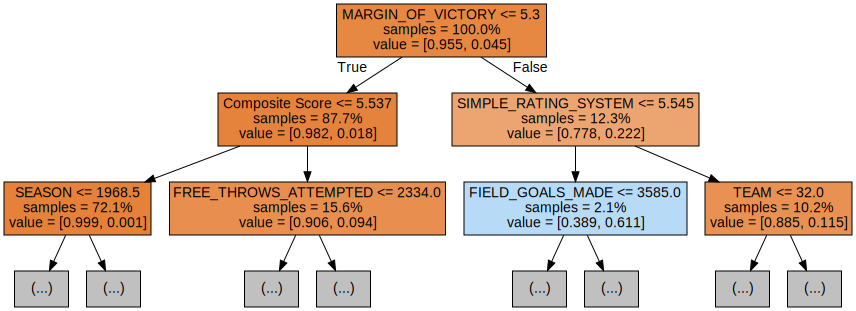

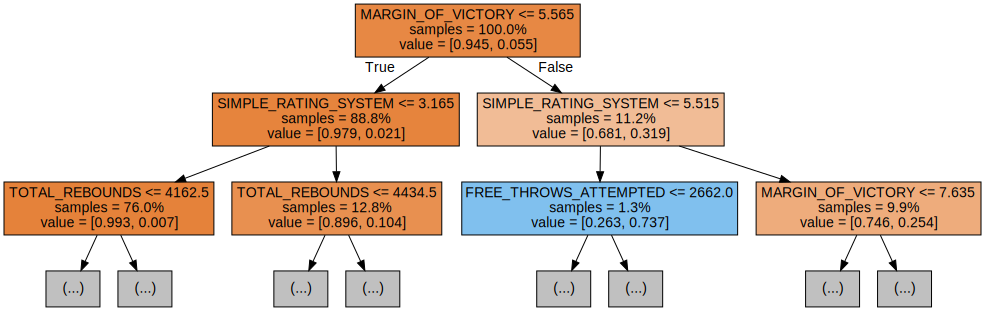

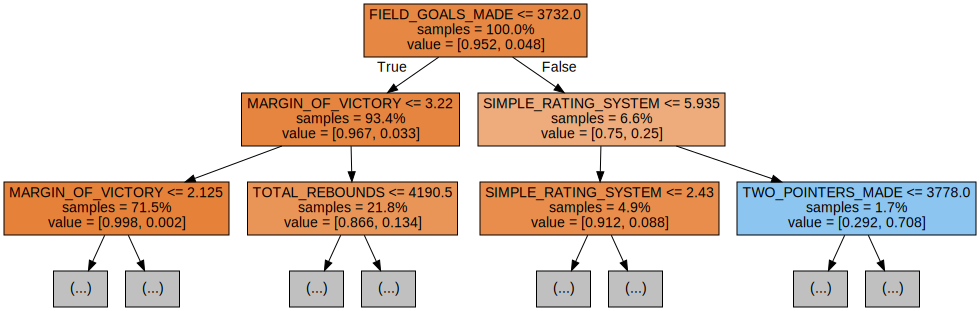

In [ ]:
# Export the first three decision trees from the forest

import graphviz
from sklearn.tree import export_graphviz

for i in range(3):
    tree = modelF.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    graph.render(f'tree_{i}', format='png')
    display(graph)



## **Insights and Conclusion**

In our recent data science project, we leveraged historical data on player performance, opponent statistics, and team attributes to predict the 2024 NBA champion. Our extensive data cleaning and processing led us to identify the most relevant features for our predictive model. Interestingly, we found that features extracted from team-related data sources provided the most predictive power.

We utilized Random Forests as our primary machine learning model due to its ability to handle large datasets with numerous features while effectively managing overfitting. This approach enabled us to capture complex relationships within the data and make robust predictions about future championship outcomes.

Our model’s prediction pointed towards the Boston Celtics as the potential victors of the NBA 2024 championship. This insight underscores the effectiveness of our approach in analyzing historical trends and team performance metrics to identify strong contenders for the title.

In conclusion, our project yielded valuable insights into the factors influencing team success in professional basketball. Our focus on relevant features and the use of Random Forests as our predictive model allowed us to provide actionable insights for stakeholders and enthusiasts alike. While our model’s forecast favors the Boston Celtics, we acknowledge the dynamic nature of sports and the potential for unexpected outcomes. Nonetheless, our methodology demonstrates the potential of data-driven approaches in enhancing decision-making processes and gaining deeper insights into the complex dynamics of competitive sports.

This project was a great learning experience, helping us develop skills in data cleaning and processing. The prediction of the Boston Celtics as potential winners reaffirms our belief in the effectiveness of our work as they are currently up 1-0 in the NBA playoffs semi-final. We unearthed valuable insights and presented visualizations that could spur further inquiries and investigations, potentially leading to positive outcomes for basketball, such as improved popularity, performance, scouting, and player development.

While we wouldn’t advise using our prediction as a sure bet due to the preliminary nature of our model and the observed imprecision in the values, we hope that the outcome of this year’s NBA season reflects the results of our report. We believe the low scores for the positive outcome in our model are due to our data being unbalanced. For future research, we recommend considering other ensemble methods adapted for imbalanced data, such as Synthetic Minority Over-sampling Technique (SMOTE).

Looking ahead, we are hopeful that our work will contribute to the broader understanding of basketball dynamics and inspire further research in this exciting field.

In [ ]:
!pip install nbconvert

In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [ ]:
!jupyter nbconvert --to html Final-Project.ipynb

[NbConvertApp] Converting notebook Final-Project.ipynb to html
[NbConvertApp] Writing 2093862 bytes to Final-Project.html
